In [ ]:
install.packages("WallomicsData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("BiocParallel")

BiocManager::install('mixOmics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite',
  'vroom', 'waldo', 'whisker', 'xfun', 'xml2', 'zip', 'boot', 'class',
  'foreign', 'KernSmooth', 'MASS', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories",

In [ ]:
# Charger les packages

library(mixOmics)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.24.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [ ]:
library(WallomicsData)

In [ ]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [ ]:
library("matrixStats")

In [ ]:
data("Altitude_Cluster")
data("Ecotype")
data("Genetic_Cluster")
data("Metabolomics_Rosettes")
data("Metabolomics_Stems")
data("Metadata")
data("Phenomics_Rosettes")
data("Phenomics_Stems")
data("Proteomics_Rosettes_CW")
data("Proteomics_Stems_CW")
data("Transcriptomics_Rosettes")
data("Transcriptomics_Rosettes_CW")
data("Transcriptomics_Stems")
data("Transcriptomics_Stems_CW")


#univariate analysis ROSETTE Genetic_Cluster

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Rosettes)){Metabolomics_Rosettes[,i][is.na(Metabolomics_Rosettes[,i])]<-median(Metabolomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Rosettes)){Phenomics_Rosettes[,i][is.na(Phenomics_Rosettes[,i])]<-median(Phenomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Rosettes_CW)){Proteomics_Rosettes_CW[,i][is.na(Proteomics_Rosettes_CW[,i])]<-median(Proteomics_Rosettes_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes)){Transcriptomics_Rosettes[,i][is.na(Transcriptomics_Rosettes[,i])]<-median(Transcriptomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes_CW)){Transcriptomics_Rosettes_CW[,i][is.na(Transcriptomics_Rosettes_CW[,i])]<-median(Transcriptomics_Rosettes_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Rosettes)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Rosettes <- Transcriptomics_Rosettes[,-which(colnames(Transcriptomics_Rosettes)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

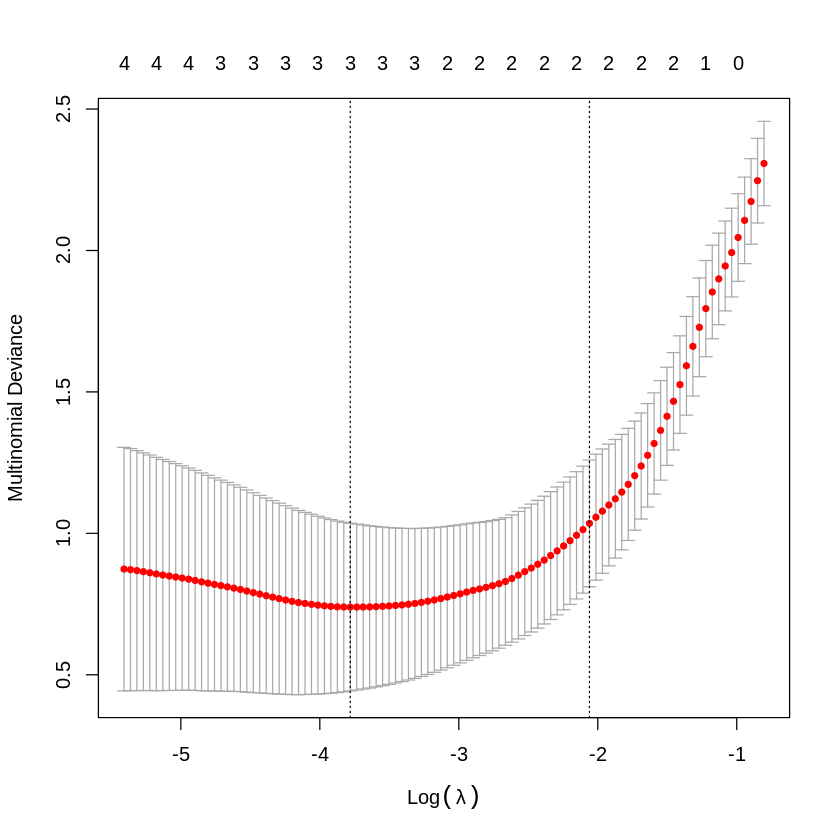

In [ ]:
#Proteomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Rosettes_CW), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Rosettes_CW)[unlist(coef)]
Proteomics_Rosettes_CW<-subset(Proteomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

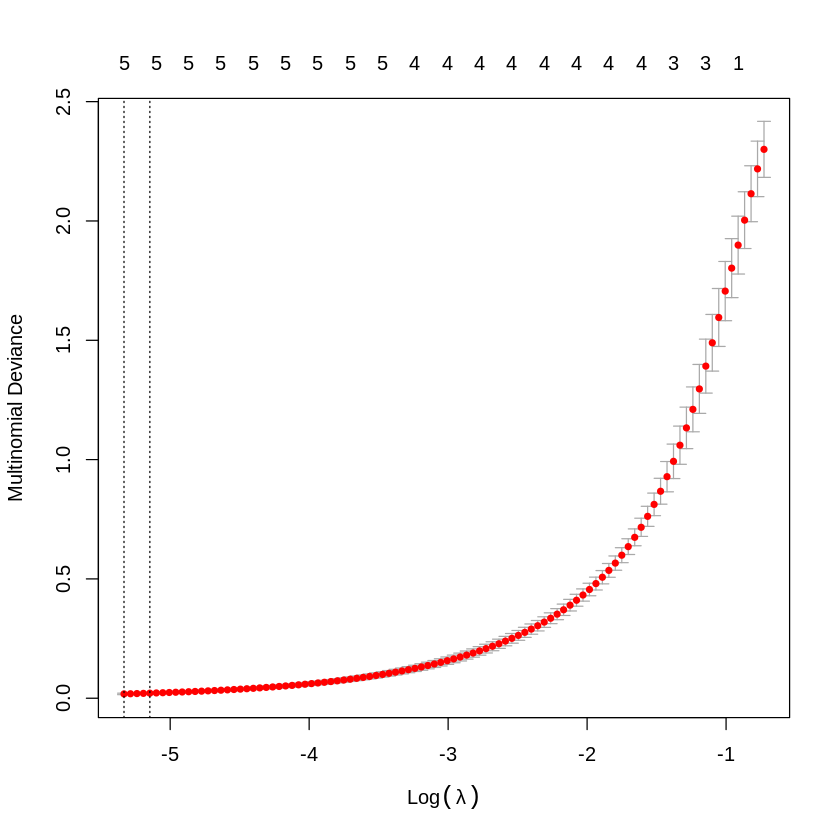

In [ ]:
#Transcriptomics_Rosettes
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes)[unlist(coef)]
Transcriptomics_Rosettes<-subset(Transcriptomics_Rosettes, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

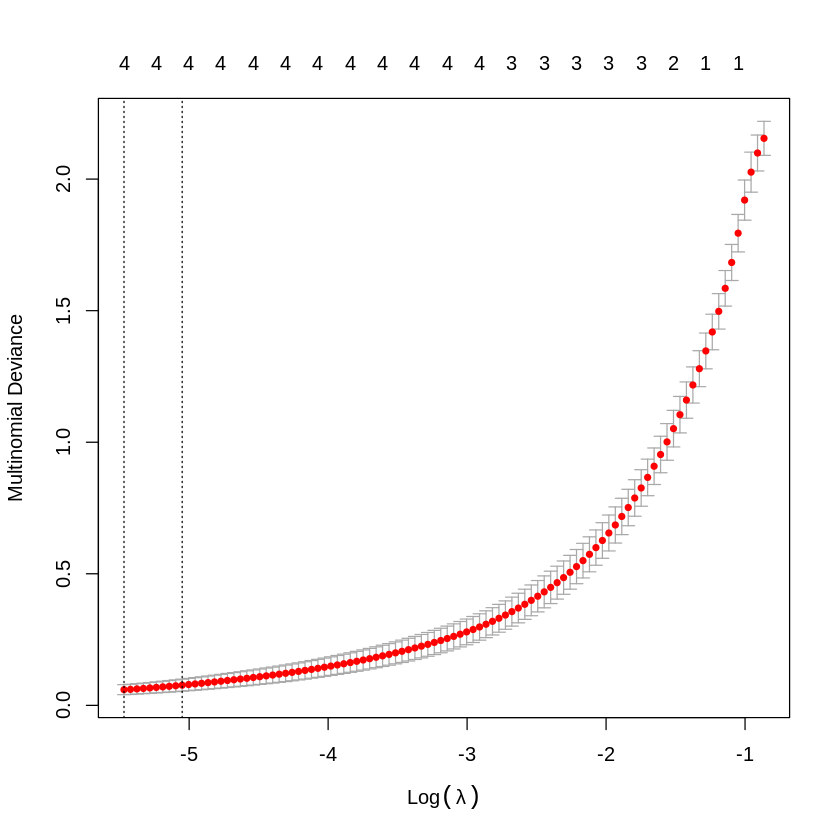

In [ ]:
#Transcriptomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes_CW), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes_CW)[unlist(coef)]
Transcriptomics_Rosettes_CW<-subset(Transcriptomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Rosettes_CW)
dim(Transcriptomics_Rosettes)
dim(Proteomics_Rosettes_CW)

[1] 30 20

[1] 30 16

[1] 30 16

###PCA analysis:

**Metabolomics_Rosettes:**

,Pectin_RGI,Pectin_HG,XG,Pectin_linearity,Contribution_RG,RGI_branching
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Col.22.1,75.95791,60.28917,92.87987,0.9402467,0.2876133,2.697849
Col.22.2,63.70577,76.67599,89.75543,1.3244072,0.1683510,3.485004
Col.22.3,69.04940,78.73487,103.19934,1.2785566,0.1996149,2.918205
Col.15.1,57.55757,43.65080,81.75463,0.8494954,0.1979410,4.947072
Col.15.2,79.39145,74.33798,116.75840,1.0278840,0.1643535,4.919391
Col.15.3,84.35585,73.30991,123.26794,0.9566913,0.1690592,5.182858


      PC1       PC2       PC3       PC4 
0.4375291 0.8180822 0.9684057 0.9981591 


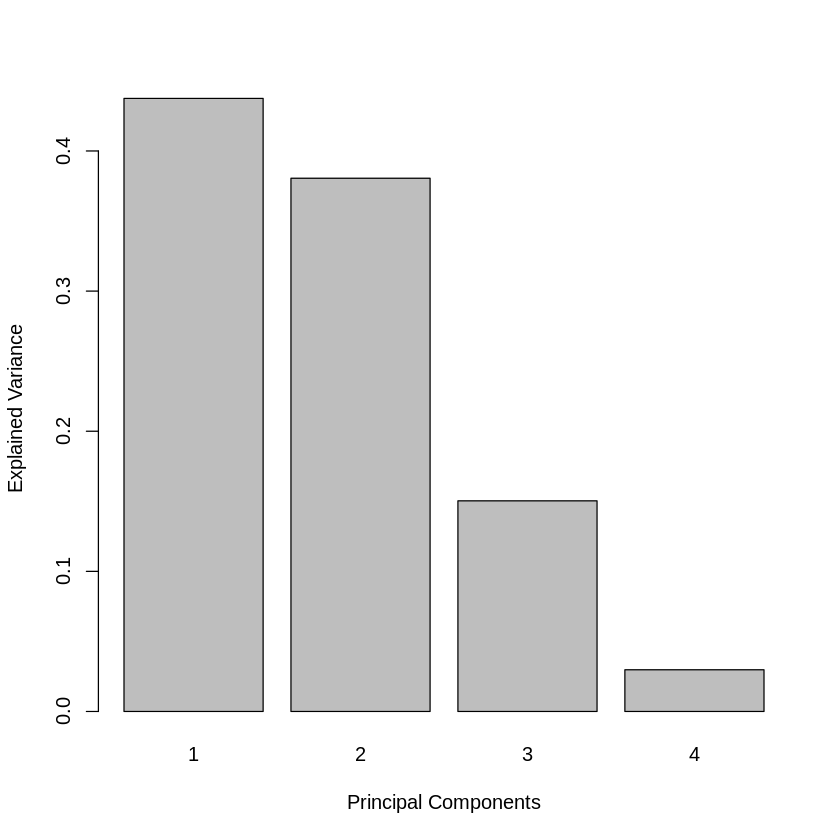

In [ ]:
#Metabolomics_Rosettes
data("Metabolomics_Rosettes")
x<-Metabolomics_Rosettes
#rownames(x)<-NULL
head(x)
pca_meta_ros<- tune.pca(x, ncomp = 4,center = TRUE, scale = TRUE)
plot(pca_meta_ros)
print(pca_meta_ros$cum.var)       # Outputs cumulative proportion of variance we see ythat the first 2 comp explains 0.81 of the variance then we only n=use them

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_meta_ros <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_meta_ros$var.tot)
print(final_pca_meta_ros$prop_expl_var$X)

In [ ]:
#Identify the informative variables
# Top variables on the first component only:
#Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

head(selectVar(final_pca_meta_ros, comp = 1)$value)

,value.var
,<dbl>
RGI_branching,-0.604496206
Pectin_linearity,0.479998269
Contribution_RG,0.469044756
XG,-0.348447872
Pectin_HG,0.250407358
Pectin_RGI,0.007953045


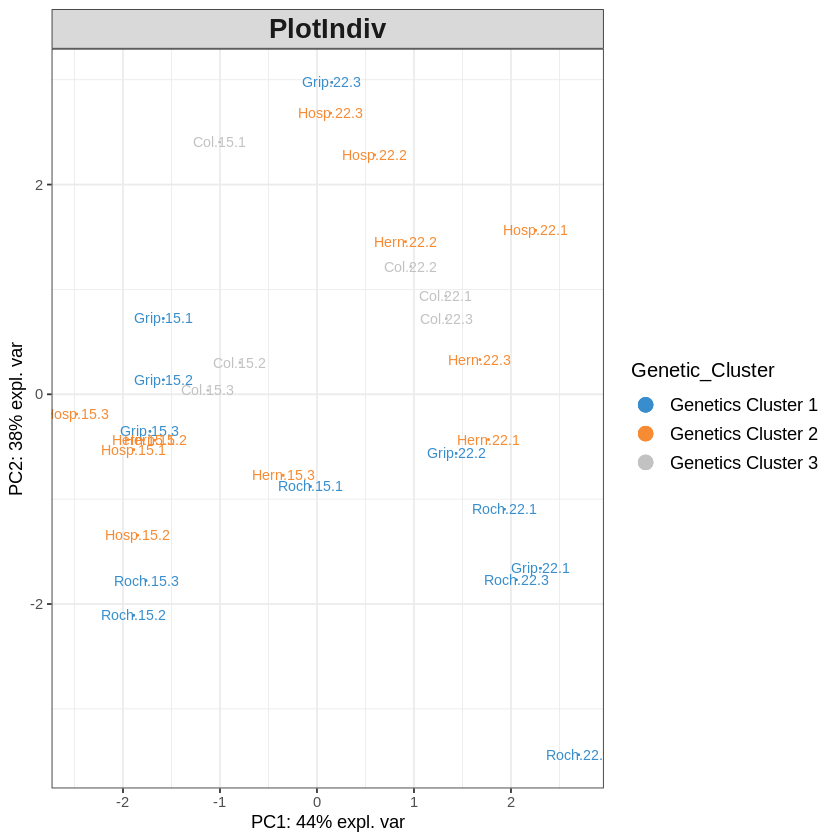

In [ ]:
data("Genetic_Cluster") # we're using this to groupe we can use also temperatures
# Interactive 3D plot will load the rgl library.
plotIndiv(final_pca_meta_ros,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group = Genetic_Cluster,
          #title = 'Metabolomics_Rosettes grouped by Genetic_Cluster',
          legend = TRUE, legend.title = 'Genetic_Cluster'
          )
#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent Genetic_Cluster from this we understand that using eco type to grp was a good choice )

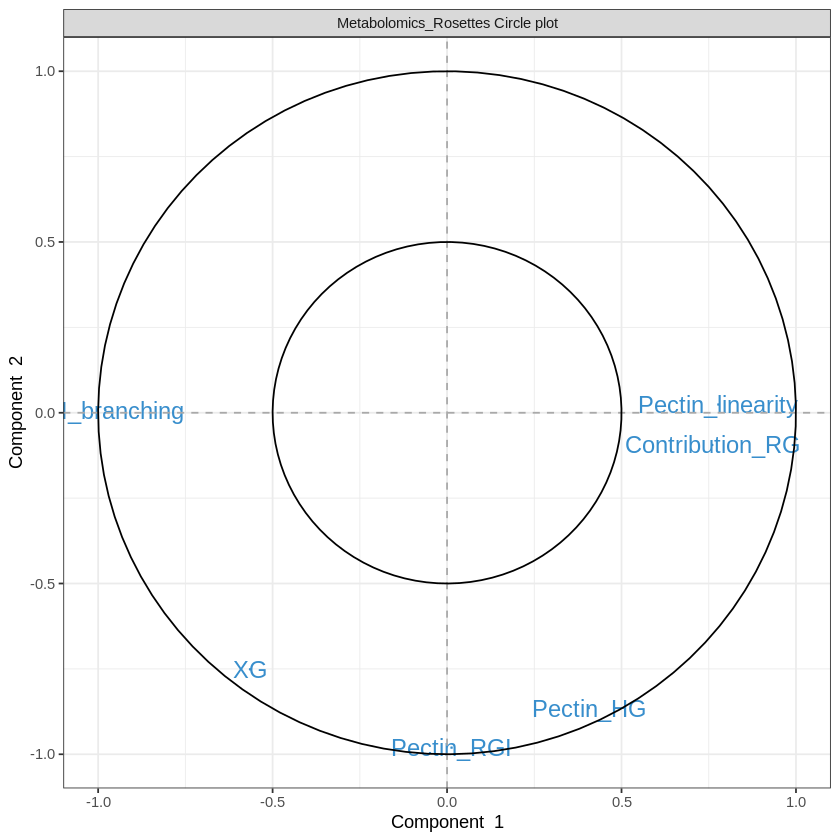

In [ ]:
# Variable plot: correlation circle plot

plotVar(final_pca_meta_ros, comp = c(1,2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomics_Rosettes Circle plot')


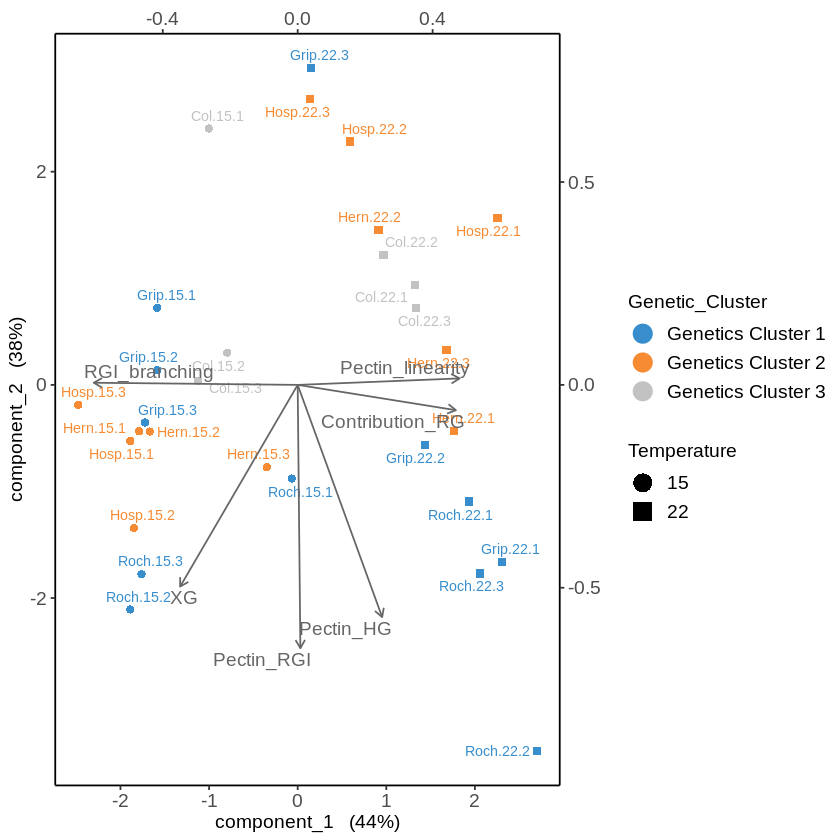

In [ ]:
#Biplot: samples and variables
biplot(final_pca_meta_ros, group = Genetic_Cluster, legend.title = 'Genetic_Cluster',pch = Temperature,legend.title.pch="Temperatue")

#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent Genetic_Cluster from this we understand that using eco type to grp was a good choice )

**Phenomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5 
0.6057165 0.9392294 0.9761129 0.9993821 1.0000000 


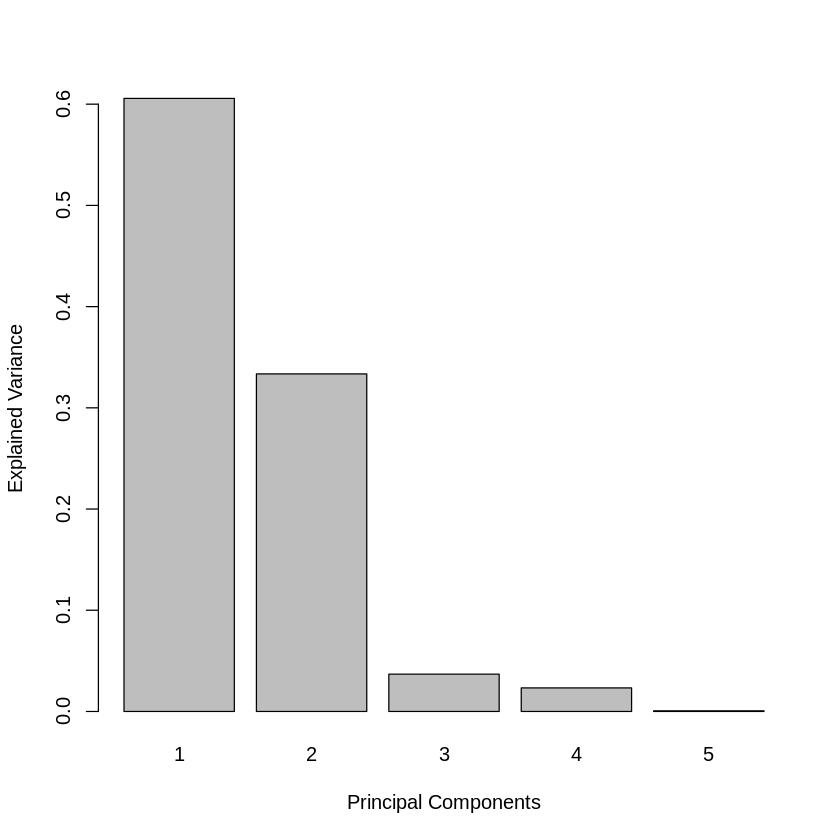

In [ ]:
x<-Phenomics_Rosettes
tune_pca_Phenomics_Rosettes <- tune.pca(x, ncomp = 5, scale = TRUE)
plot(tune_pca_Phenomics_Rosettes)
print(tune_pca_Phenomics_Rosettes$cum.var)  

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_Phenomics_Rosettes <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Rosettes$var.tot)
print(final_pca_Phenomics_Rosettes$prop_expl_var$X)

[1] 5
      PC1       PC2 
0.6057165 0.3335130 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
Mass,0.5422527
Leaves_number,0.5420844
Density,0.5145020
Area,0.3669076
Diameter,-0.1130175


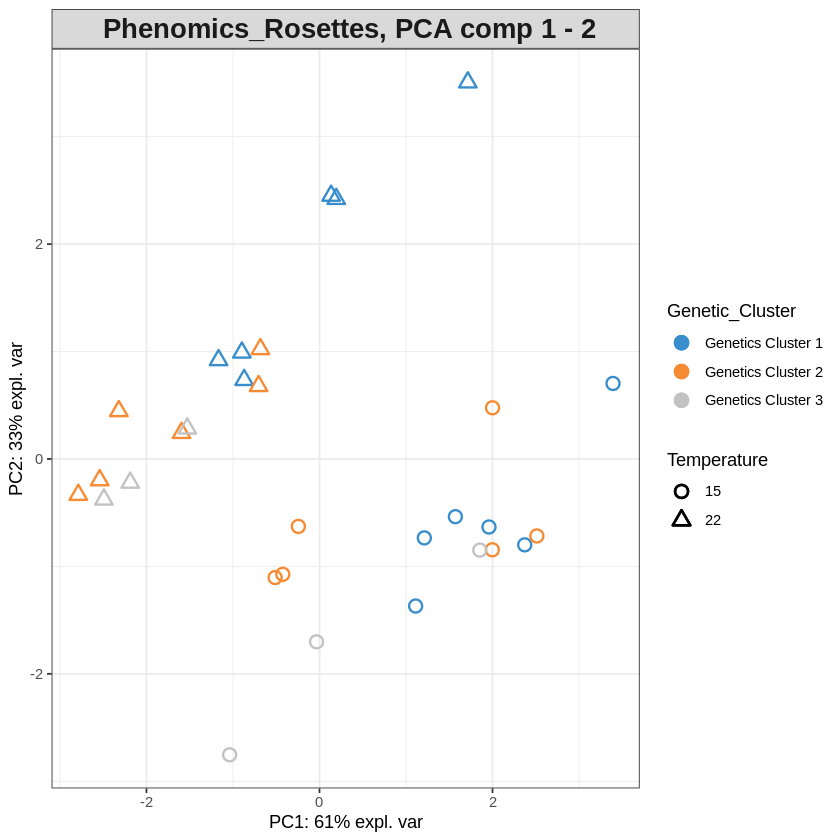

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Phenomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

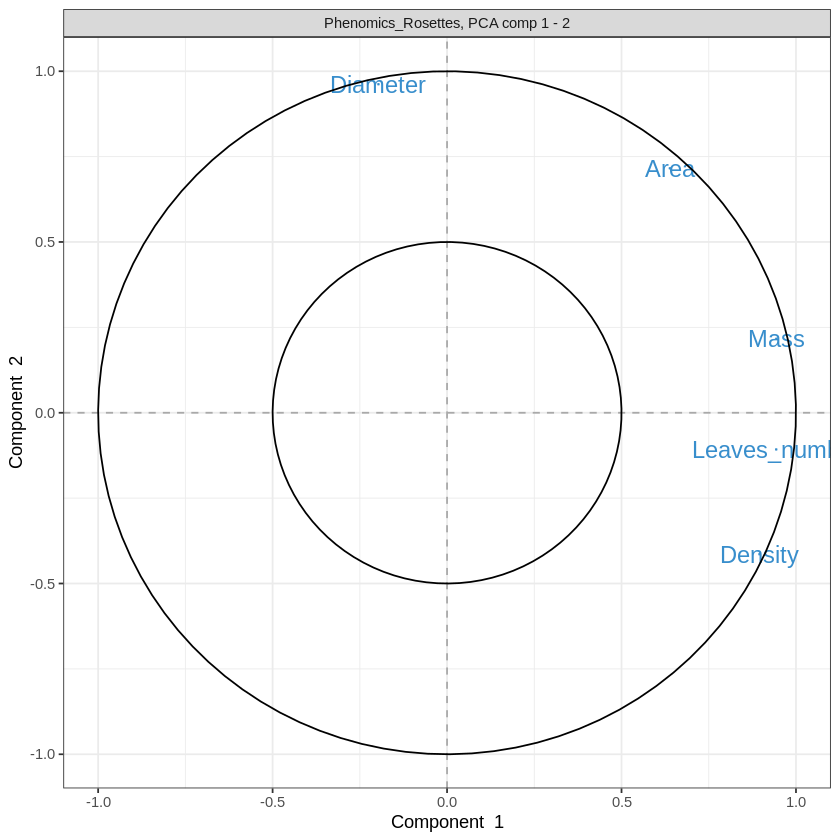

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Rosettes, PCA comp 1 - 2')

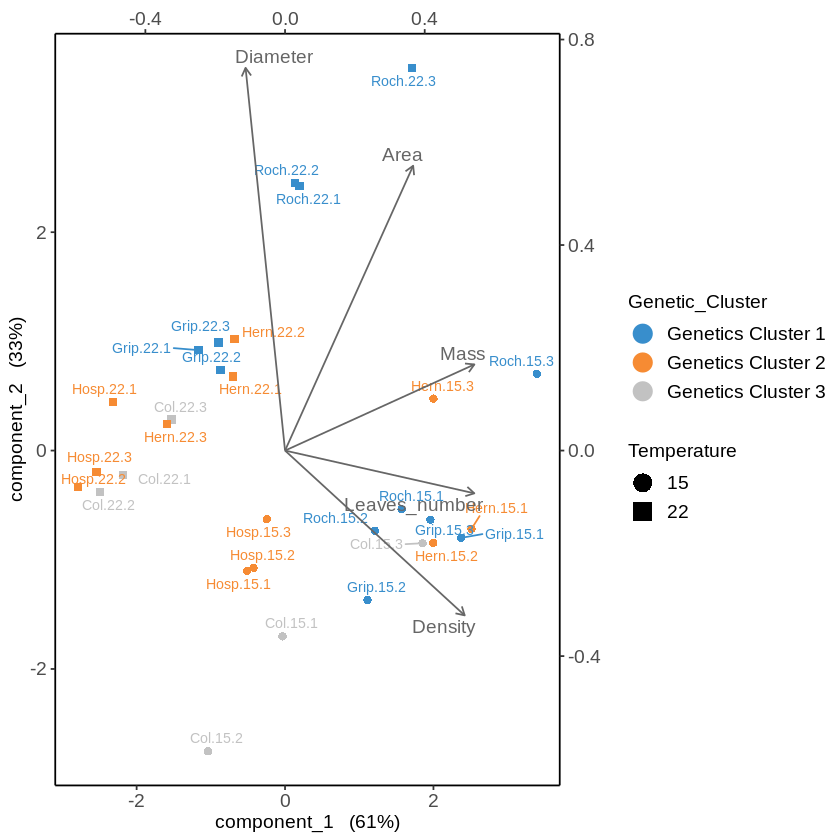

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Rosettes,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Proteomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.3311550 0.4815490 0.5871140 0.6736840 0.7437148 0.8009665 0.8510697 0.8950119 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.9269695 0.9494112 0.9662372 0.9785870 0.9887756 0.9956580 0.9984010 


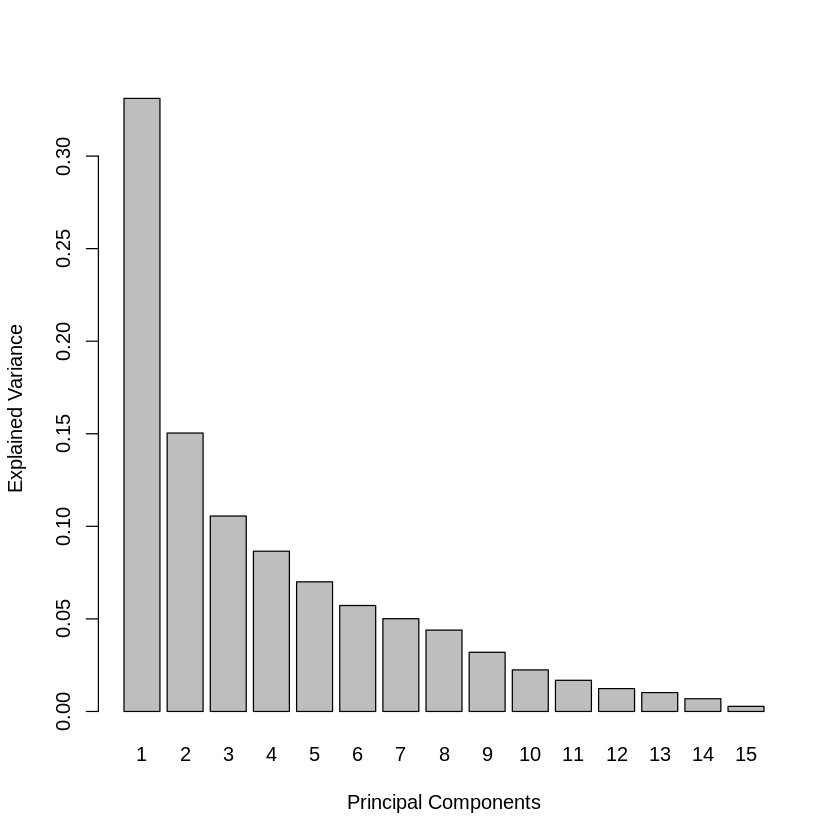

In [ ]:
x<-Proteomics_Rosettes_CW
tune_pca_Proteomics_Rosettes_CW<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Proteomics_Rosettes_CW)
print(tune_pca_Proteomics_Rosettes_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Rosettes_CW <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Rosettes_CW$var.tot)
print(final_pca_Proteomics_Rosettes_CW$prop_expl_var$X)

[1] 16
     PC1      PC2 
0.331155 0.150394 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT5G38980,-0.3790642
AT5G26000,0.3460469
AT4G29240,-0.3356192
AT5G48540,-0.3265539
AT3G28220,-0.3067159
AT1G78850,-0.2968321


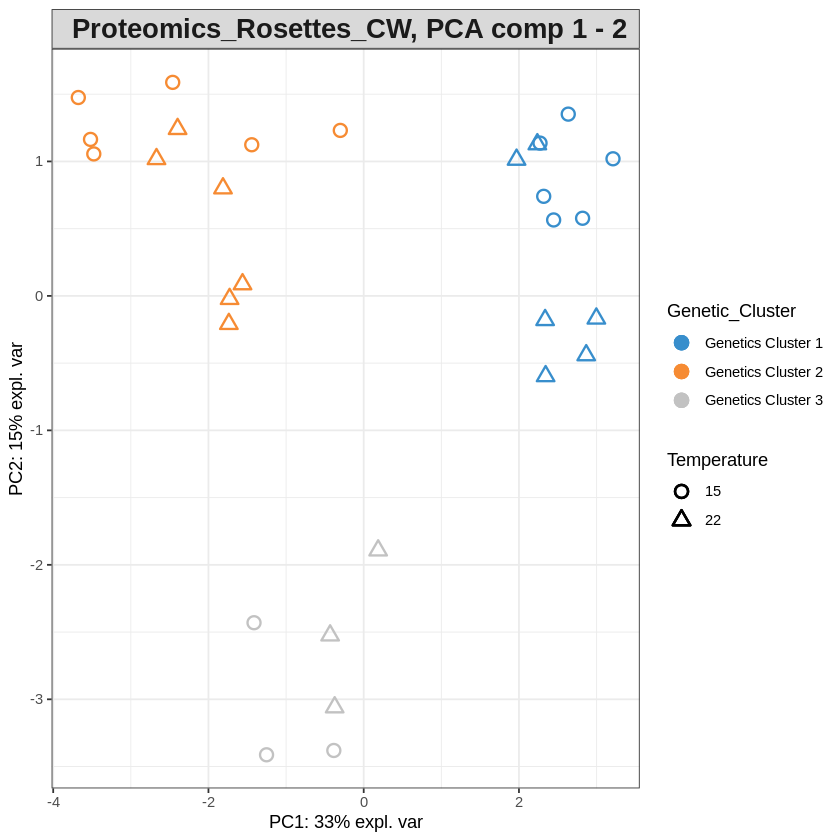

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Proteomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

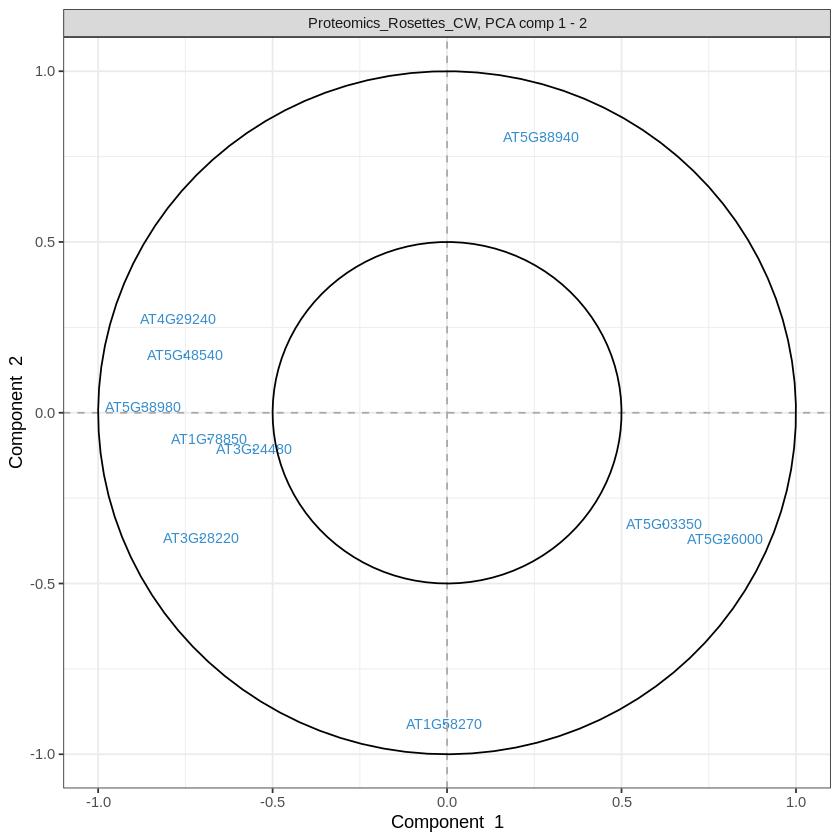

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Rosettes_CW, PCA comp 1 - 2')

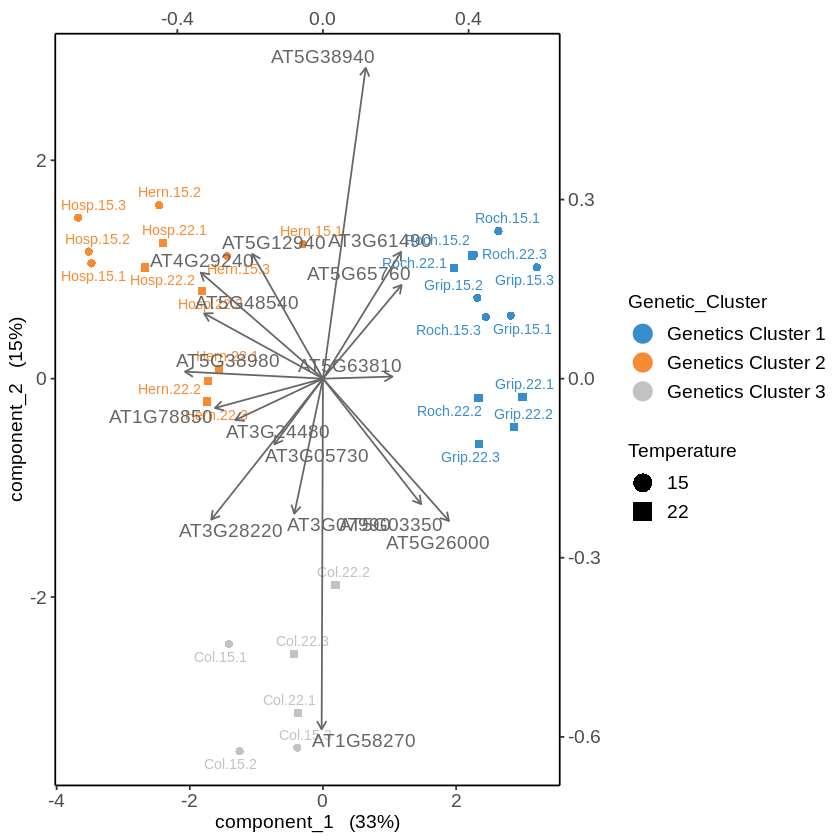

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Rosettes_CW,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Transcriptomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.5012162 0.9505528 0.9616408 0.9714661 0.9775734 0.9825181 0.9869504 0.9907963 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.9935139 0.9959516 0.9975679 0.9985949 0.9993111 0.9998339 0.9999440 


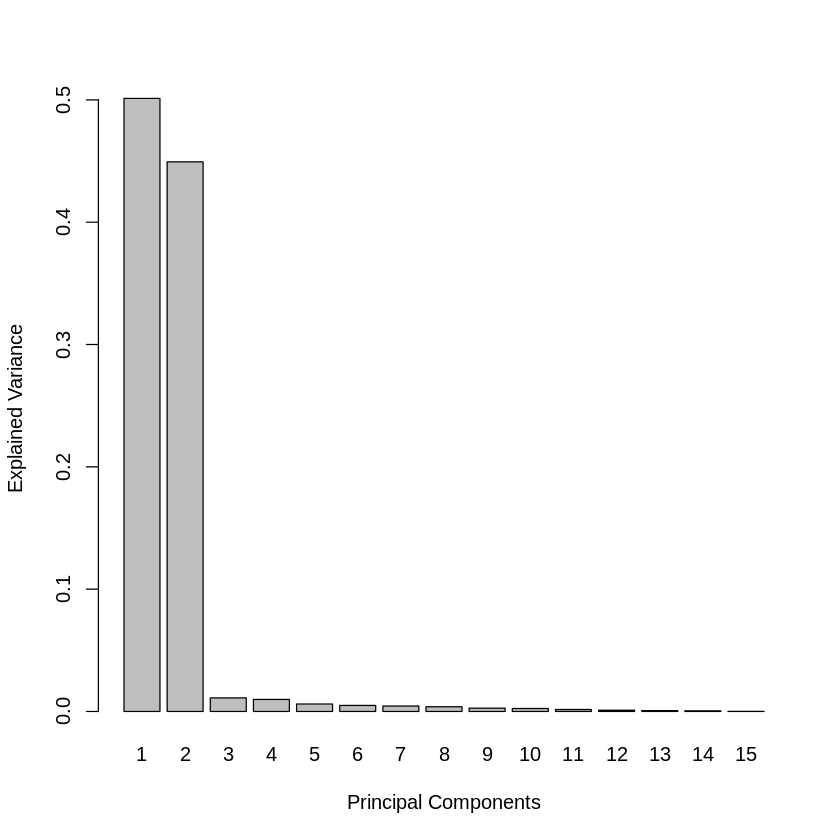

In [ ]:
x<-Transcriptomics_Rosettes
tune_pca_Transcriptomics_Rosettes<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes)
print(tune_pca_Transcriptomics_Rosettes$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes$var.tot)
print(final_pca_Transcriptomics_Rosettes$prop_expl_var$X)

[1] 16
      PC1       PC2 
0.5012162 0.4493367 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
AT3G62460,0.3391892
AT3G29787,0.3346364
AT5G39000,0.3332612
AT4G32230,0.3273493
AT4G24860,0.3238923
AT4G19500,0.3113833


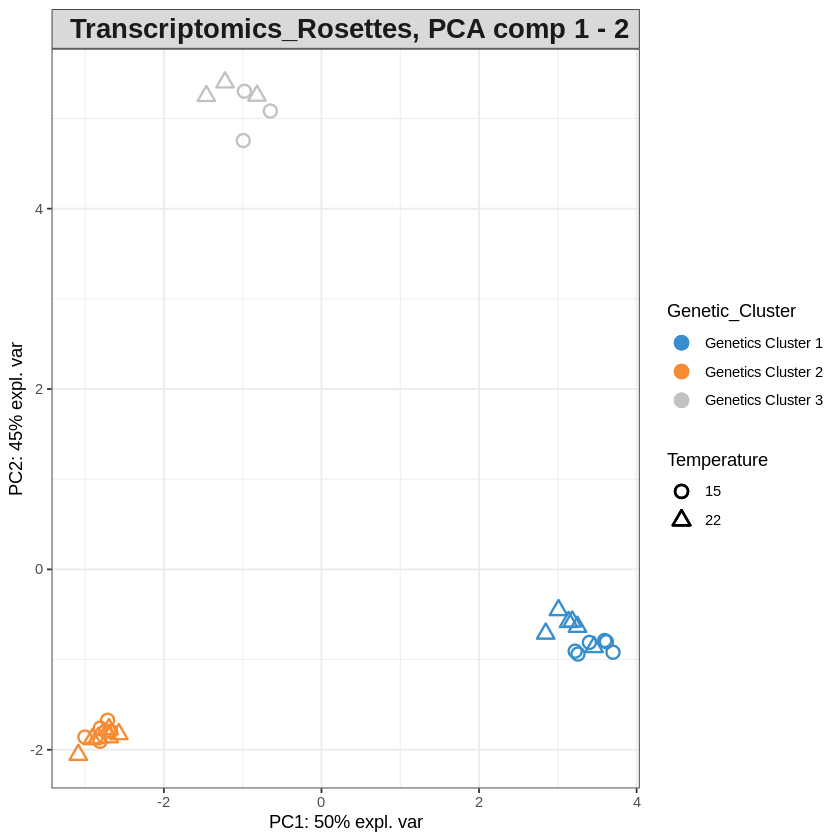

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

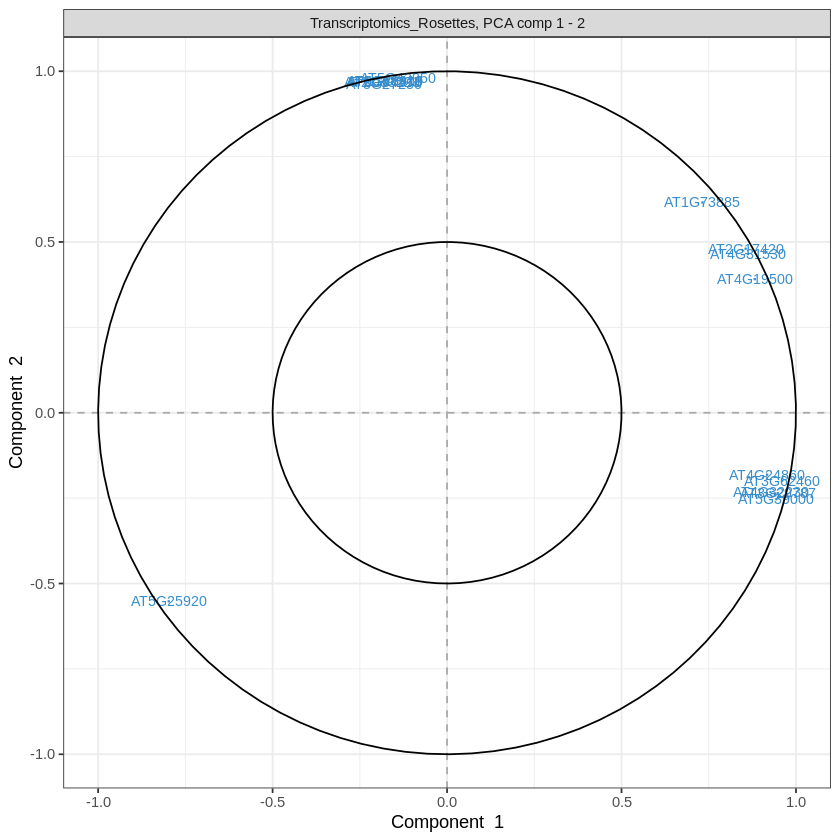

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


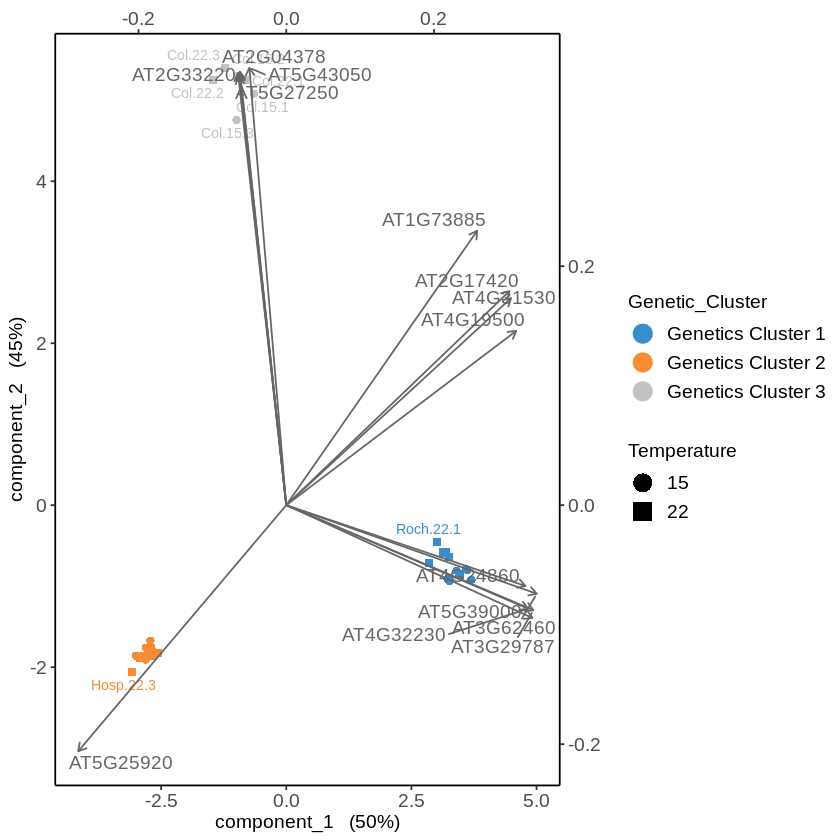

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Transcriptomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.3461918 0.5775838 0.6757172 0.7568947 0.8141036 0.8525981 0.8863640 0.9081469 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9279861 0.9447883 0.9594023 0.9709228 0.9809820 0.9896177 0.9938544 0.9965205 
     PC17      PC18 
0.9983919 0.9997698 


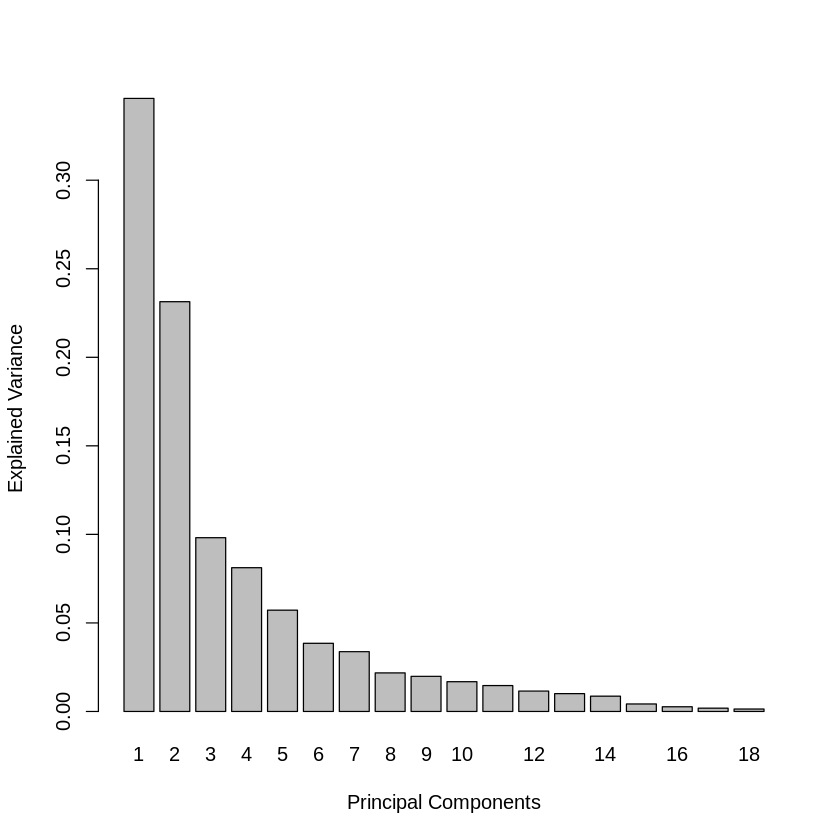

In [ ]:
x<-Transcriptomics_Rosettes_CW
tune_pca_Transcriptomics_Rosettes_CW<- tune.pca(x, ncomp = 18, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes_CW)
print(tune_pca_Transcriptomics_Rosettes_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes_CW$var.tot)
print(final_pca_Transcriptomics_Rosettes_CW$prop_expl_var$X)

[1] 20
      PC1       PC2 
0.3461918 0.2313921 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT5G38980,-0.3205868
AT5G21105,0.3150933
AT5G21105.1,0.3150933
AT3G61820,0.3131595
AT4G29240,-0.3061600
AT3G45940,0.3012544


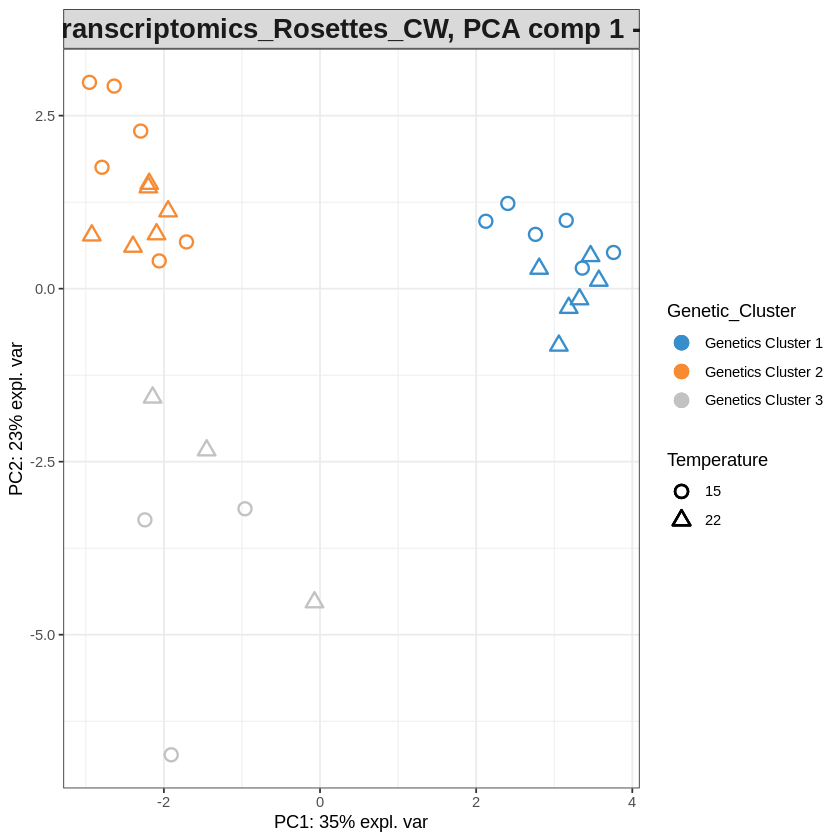

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

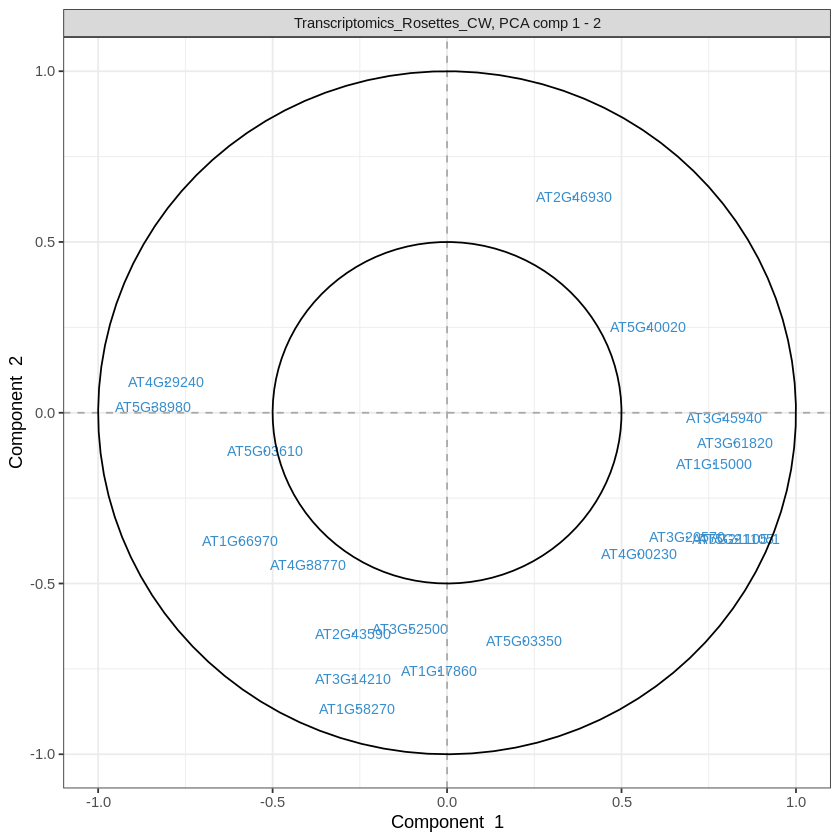

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes_CW, PCA comp 1 - 2')

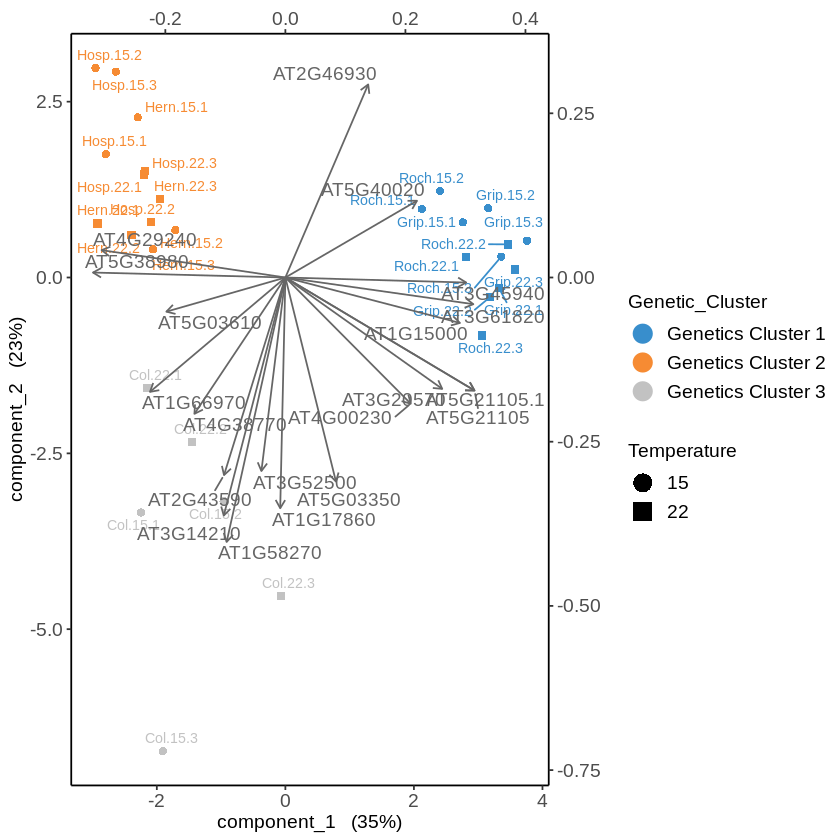

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes_CW,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

#.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>




#UNIVARIATE STEM Genetic_Cluster

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Stems)){Metabolomics_Stems[,i][is.na(Metabolomics_Stems[,i])]<-median(Metabolomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Stems)){Phenomics_Stems[,i][is.na(Phenomics_Stems[,i])]<-median(Phenomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Stems_CW)){Proteomics_Stems_CW[,i][is.na(Proteomics_Stems_CW[,i])]<-median(Proteomics_Stems_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems)){Transcriptomics_Stems[,i][is.na(Transcriptomics_Stems[,i])]<-median(Transcriptomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems_CW)){Transcriptomics_Stems_CW[,i][is.na(Transcriptomics_Stems_CW[,i])]<-median(Transcriptomics_Stems_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Stems)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Stems <- Transcriptomics_Stems[,-which(colnames(Transcriptomics_Stems)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

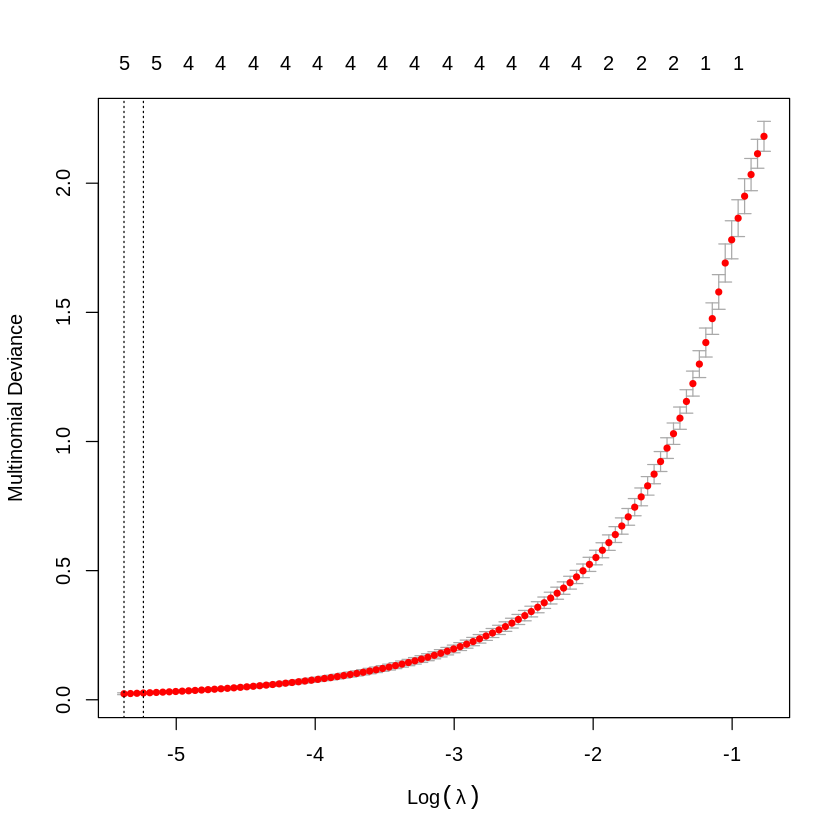

In [ ]:
#Proteomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Stems_CW), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Stems_CW)[unlist(coef)]
Proteomics_Stems_CW<-subset(Proteomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

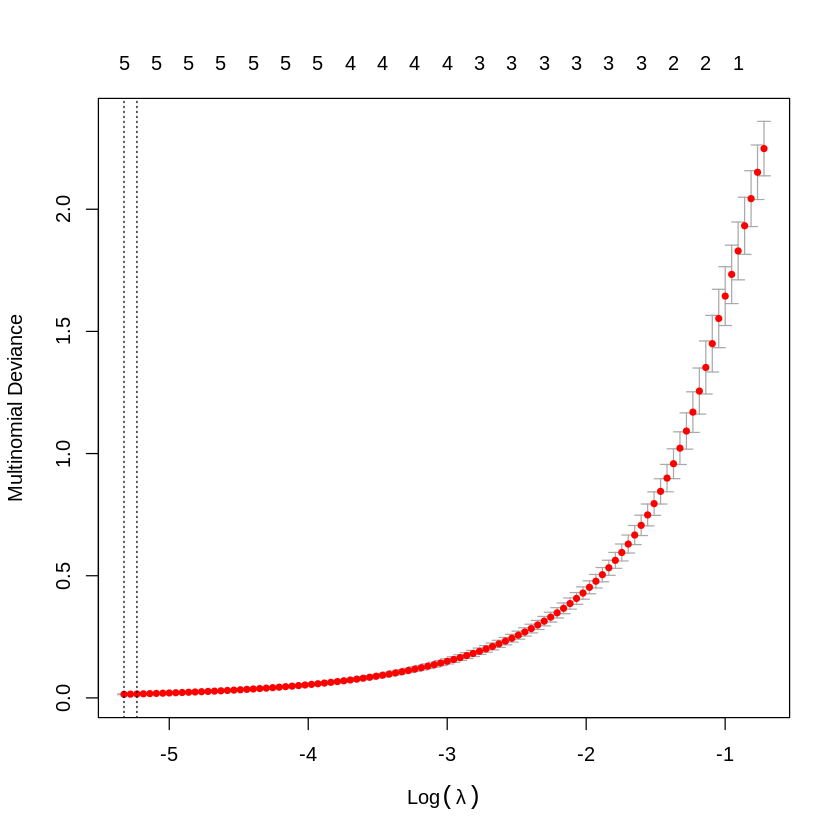

In [ ]:
#Transcriptomics_Stems
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems)[unlist(coef)]
Transcriptomics_Stems<-subset(Transcriptomics_Stems, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

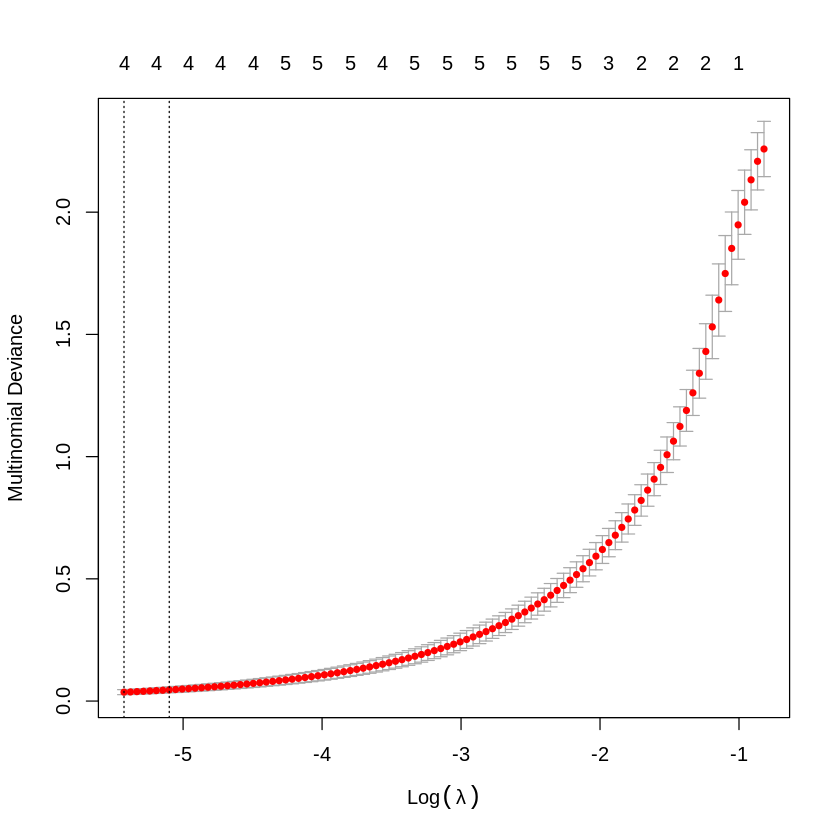

In [ ]:
#Transcriptomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems_CW), Genetic_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems_CW)[unlist(coef)]
Transcriptomics_Stems_CW<-subset(Transcriptomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Stems_CW)
dim(Transcriptomics_Stems)
dim(Proteomics_Stems_CW)

[1] 30 15

[1] 30 17

[1] 30 13

###PCA Analysis:

**Metabolomics_Stems:**

      PC1       PC2       PC3       PC4       PC5       PC6 
0.5732580 0.8533077 0.9864812 0.9956743 0.9991212 1.0000000 


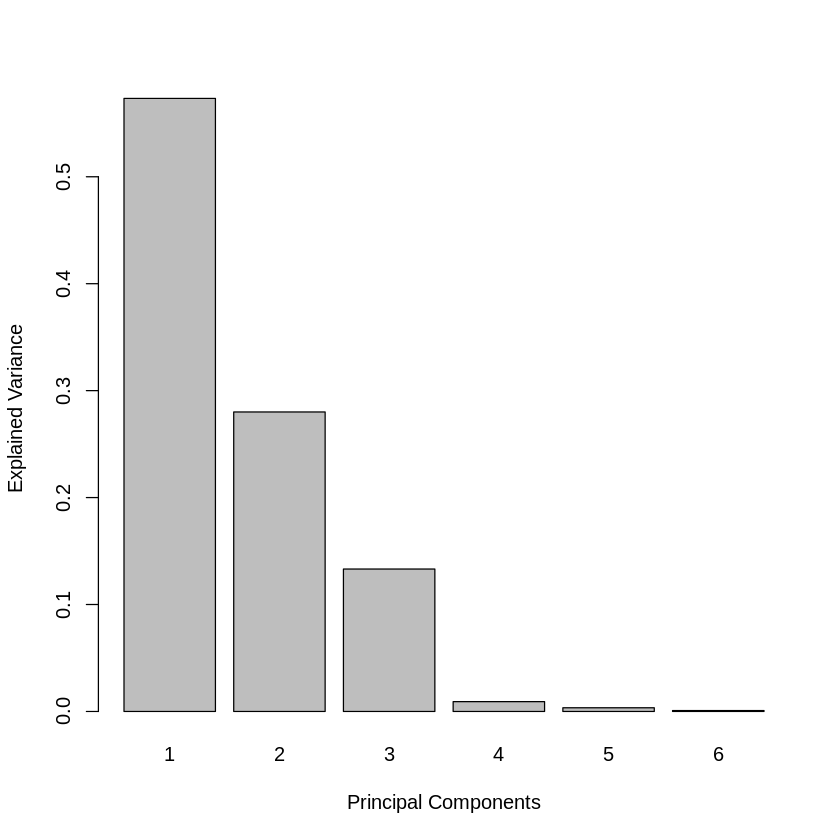

In [ ]:
x<-Metabolomics_Stems
tune_pca_metabo_stm <- tune.pca(x, ncomp = 6, scale = TRUE)
plot(tune_pca_metabo_stm)
print(tune_pca_metabo_stm$cum.var)       # Outputs cumulative proportion of variance

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.85 of the total variance gence we only use those
final_pca_Metabo_stm <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Metabo_stm$var.tot)
print(final_pca_Metabo_stm$prop_expl_var$X)

[1] 6
      PC1       PC2 
0.5732580 0.2800497 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Metabo_stm, comp = 1)$value)

,value.var
,<dbl>
XG,0.5136619
Pectin_HG,0.5076026
RGI_branching,-0.4699712
Pectin_linearity,0.3812306
Pectin_RGI,0.3297546
Contribution_RG,0.0595241


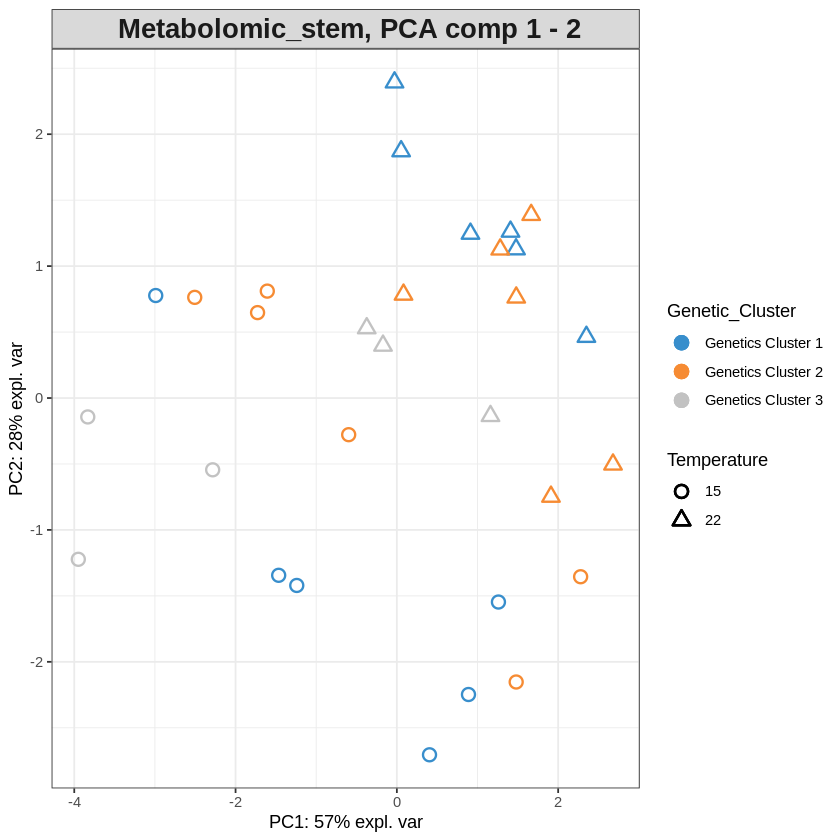

In [ ]:
#sample plots
plotIndiv(final_pca_Metabo_stm,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Metabolomic_stem, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature',)

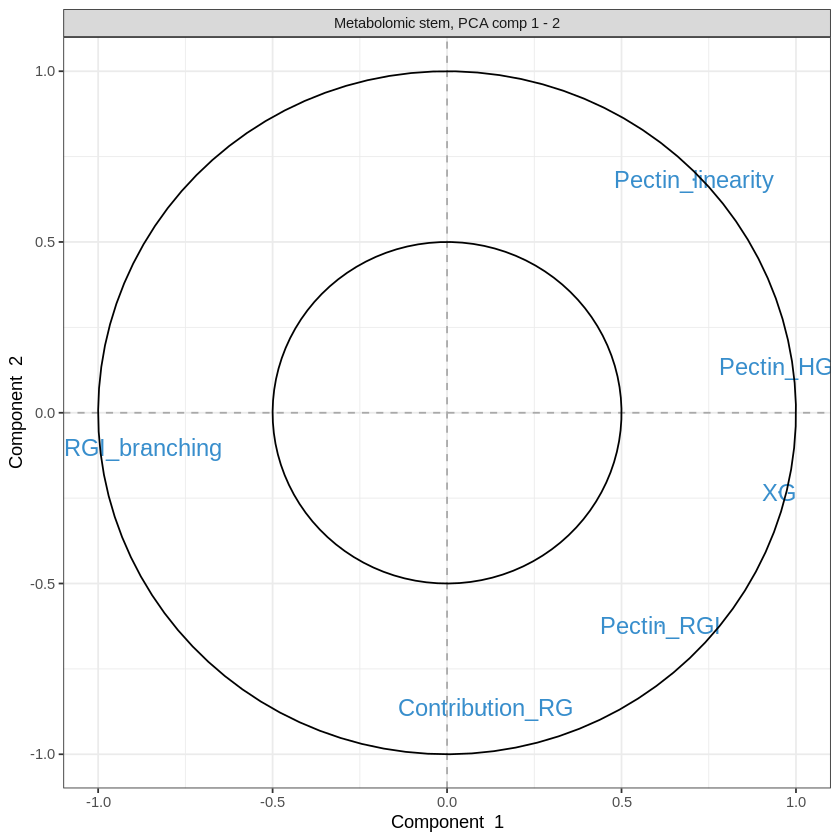

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Metabo_stm, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomic stem, PCA comp 1 - 2')

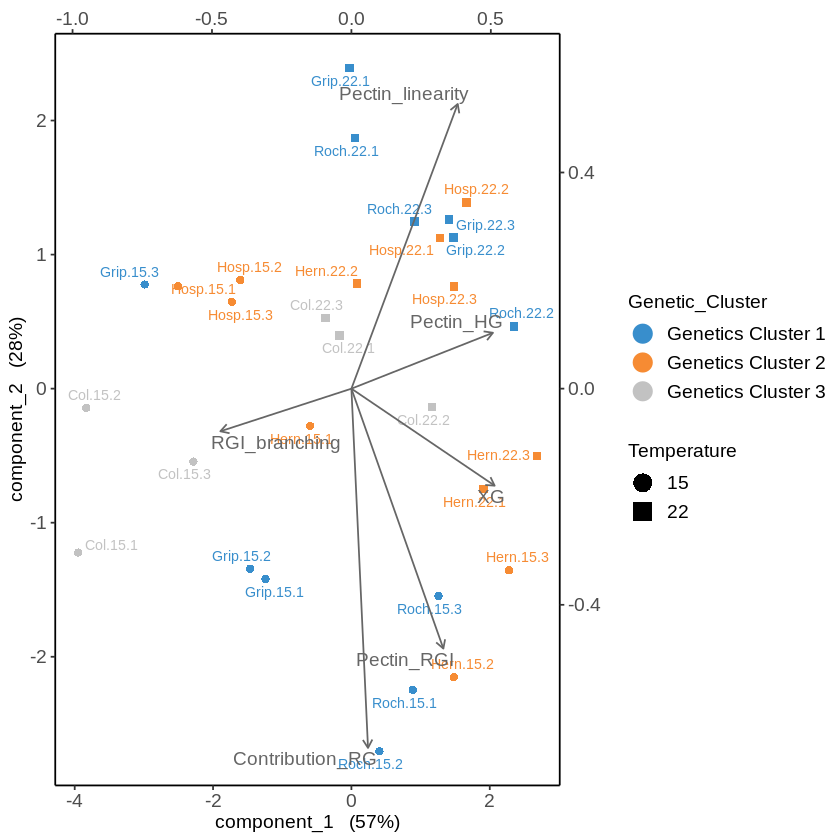

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Metabo_stm,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Phenomics_Stems:**

      PC1       PC2       PC3       PC4 
0.5388177 0.7914988 0.9674033 1.0000000 


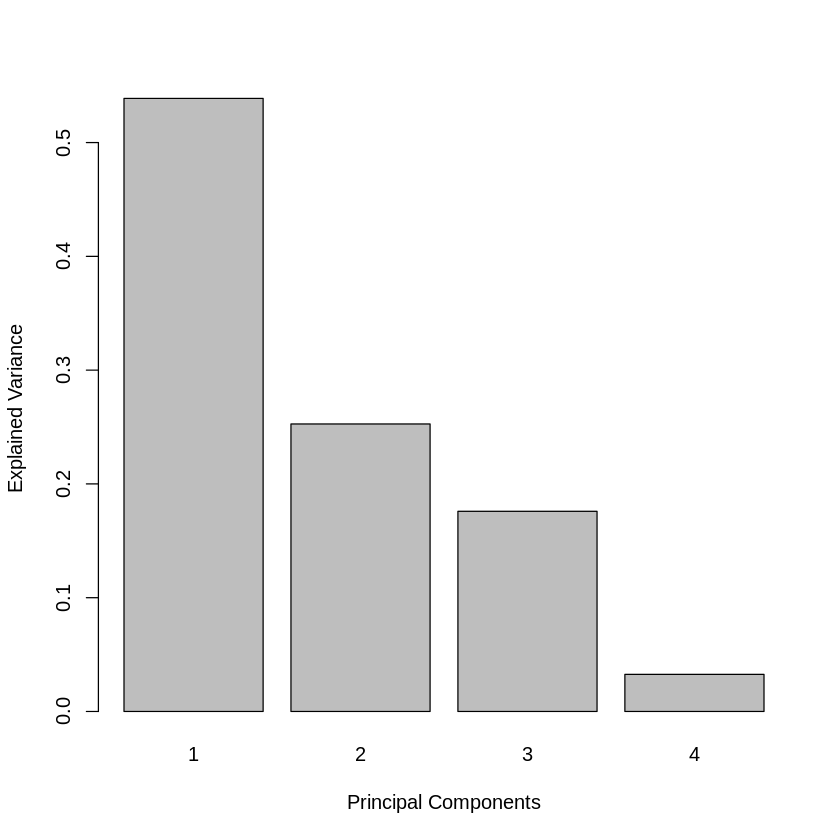

In [ ]:
x<-Phenomics_Stems
tune_pca_Phenomics_Stems <- tune.pca(x, ncomp = 4, scale = TRUE)
plot(tune_pca_Phenomics_Stems)
print(tune_pca_Phenomics_Stems$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 explains 0.96 of the total variance gence we only use those
final_pca_Phenomics_Stems <- pca(x, ncomp = 3, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Stems$var.tot)
print(final_pca_Phenomics_Stems$prop_expl_var$X)

[1] 4
      PC1       PC2       PC3 
0.5388177 0.2526811 0.1759045 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Stems, comp = 1)$value)

,value.var
,<dbl>
Mass,-0.6493278
Length,-0.5988495
Number_lateral_stems,0.4233349
Diameter,-0.2013462


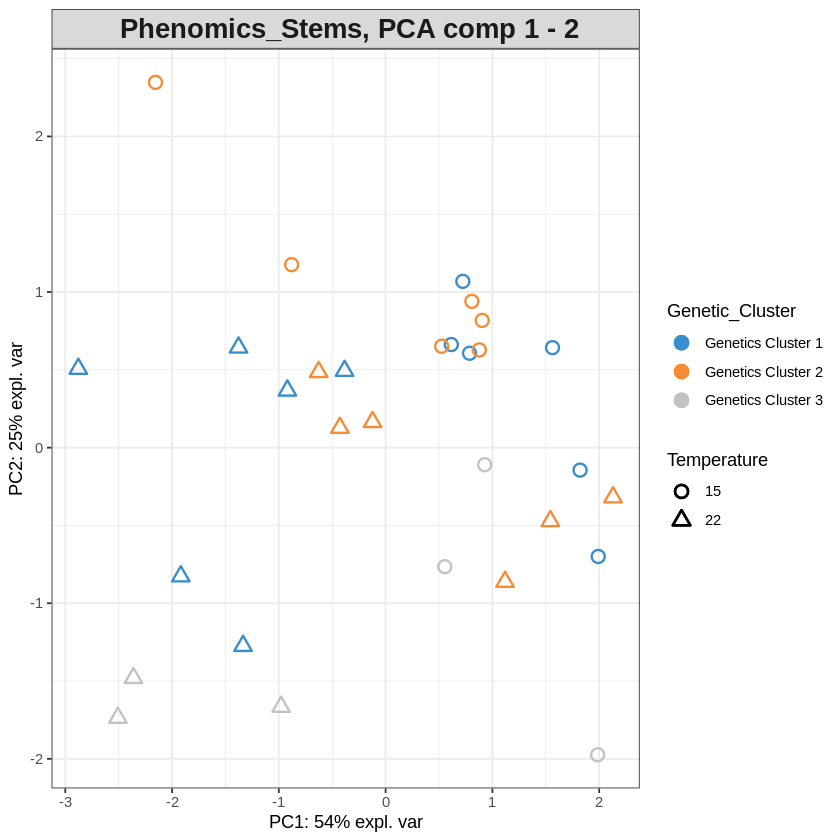

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Phenomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

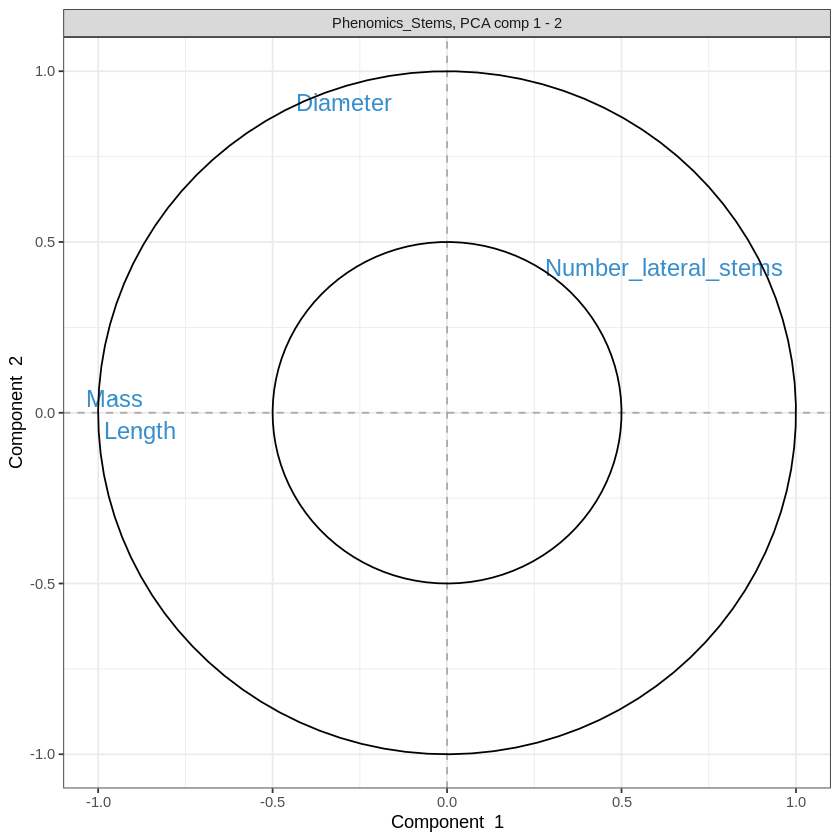

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Stems, PCA comp 1 - 2')

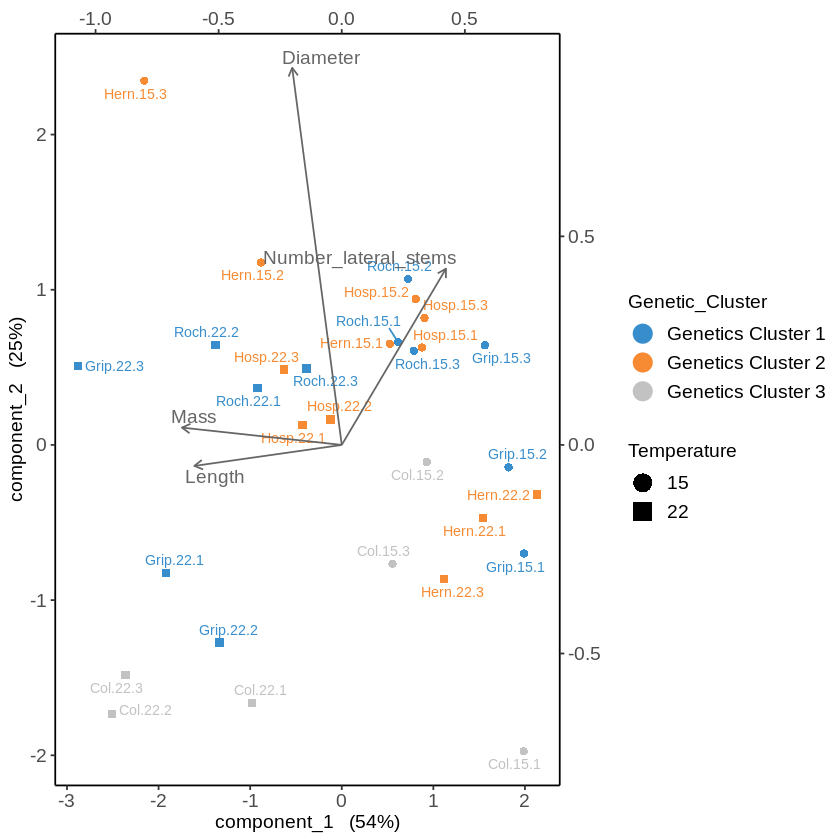

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Stems,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Proteomics_Stems_CW**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4846249 0.7268552 0.8010872 0.8605634 0.9011324 0.9309001 0.9481644 0.9642756 
      PC9      PC10 
0.9778924 0.9871969 


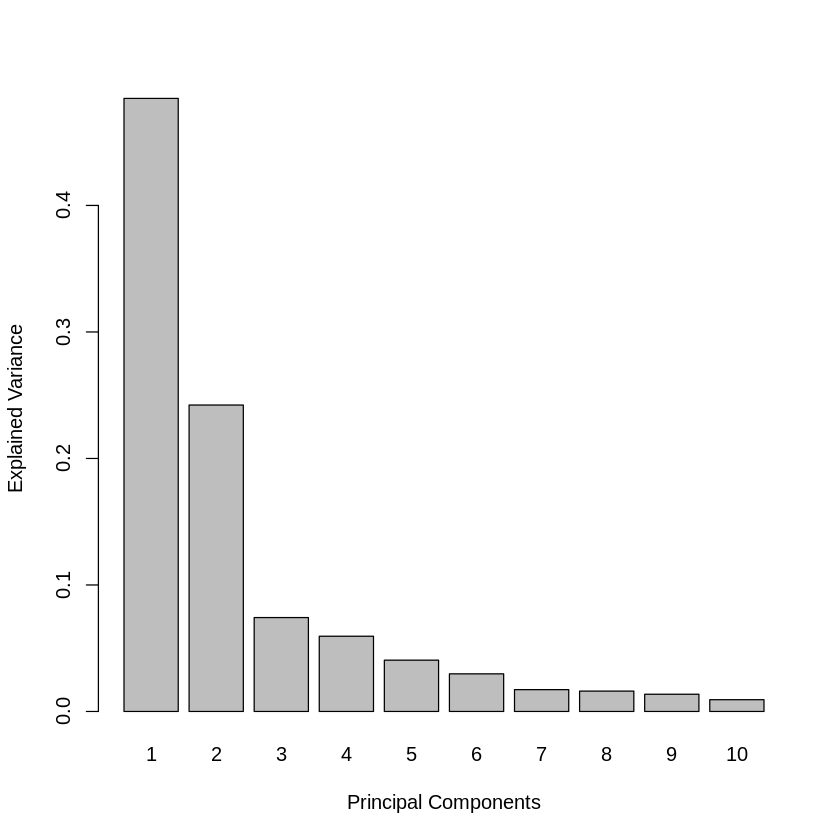

In [ ]:
x<-Proteomics_Stems_CW
tune_pca_Proteomics_Stems_CW<- tune.pca(x, ncomp = 10, scale = TRUE)
plot(tune_pca_Proteomics_Stems_CW)
print(tune_pca_Proteomics_Stems_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Stems_CW$var.tot)
print(final_pca_Proteomics_Stems_CW$prop_expl_var$X)

[1] 13
      PC1       PC2 
0.4846249 0.2422303 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT1G70710,-0.3569001
AT5G25980,-0.3426351
AT3G15356,0.3384497
AT4G21590,-0.3375479
AT3G16850,0.3369192
AT4G28250,-0.3282791


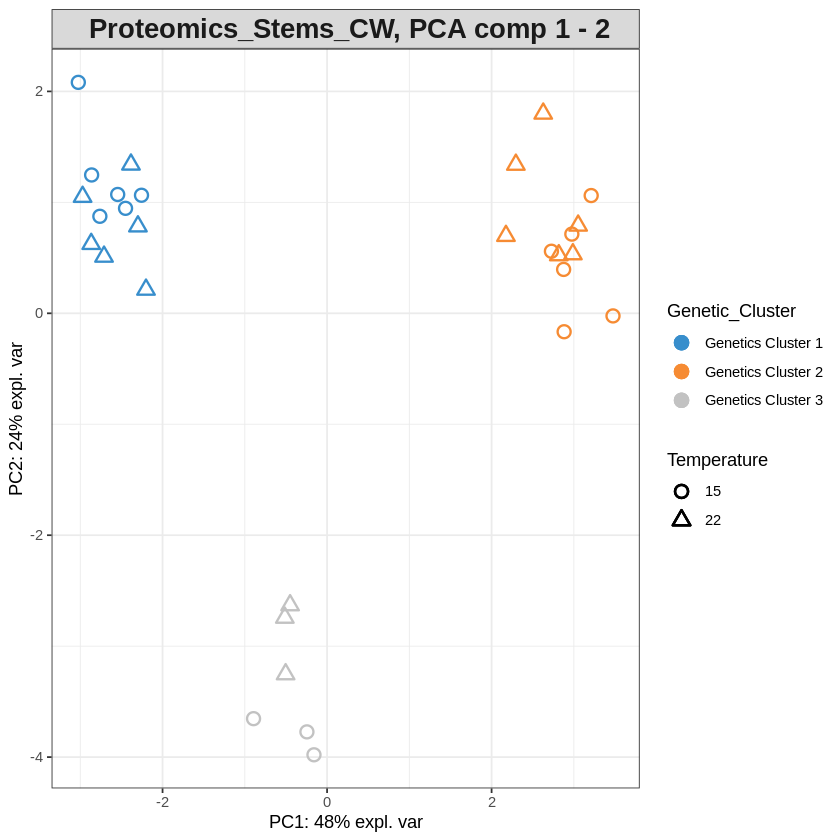

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Proteomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

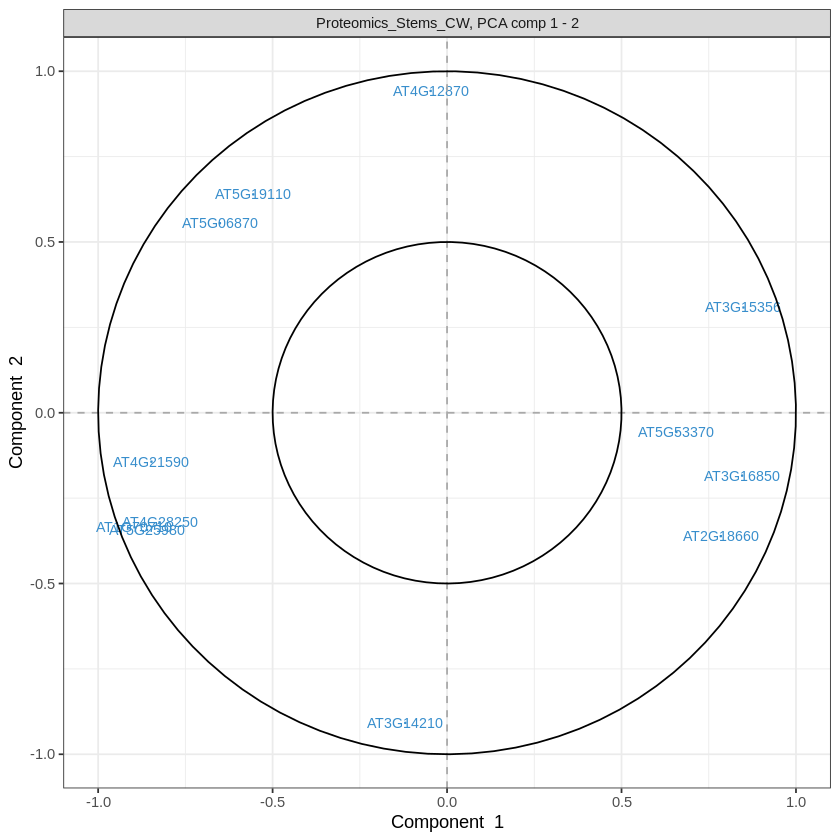

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Stems_CW, PCA comp 1 - 2')

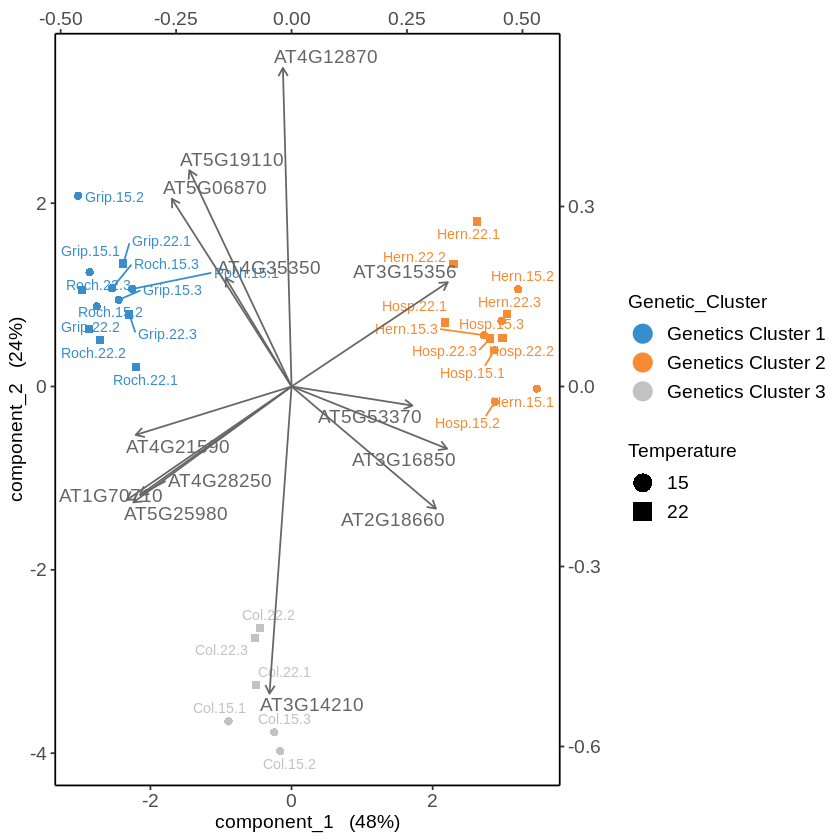

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Stems_CW,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Transcriptomics_Stems**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.5014002 0.9741868 0.9810459 0.9866899 0.9894133 0.9920021 0.9940389 0.9955709 
      PC9      PC10      PC11      PC12      PC13      PC14 
0.9968306 0.9978140 0.9985637 0.9991293 0.9995545 0.9998229 


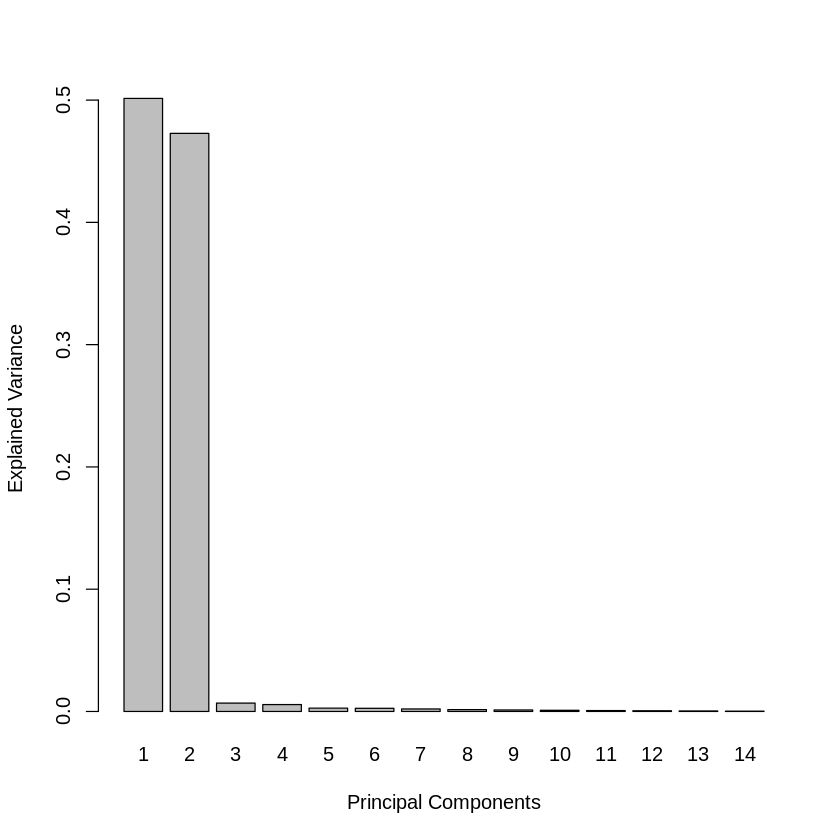

In [ ]:
x<-Transcriptomics_Stems
tune_pca_Transcriptomics_Stems<- tune.pca(x, ncomp = 14, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems)
print(tune_pca_Transcriptomics_Stems$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems$var.tot)
print(final_pca_Transcriptomics_Stems$prop_expl_var$X)

[1] 17
      PC1       PC2 
0.5014002 0.4727866 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems, comp = 1)$value)

,value.var
,<dbl>
AT1G25211,0.3326587
AT1G52347,0.3317342
AT4G14905,0.3315777
AT2G04378,0.3312991
AT5G17890,0.3308181
AT2G10410,0.3296801


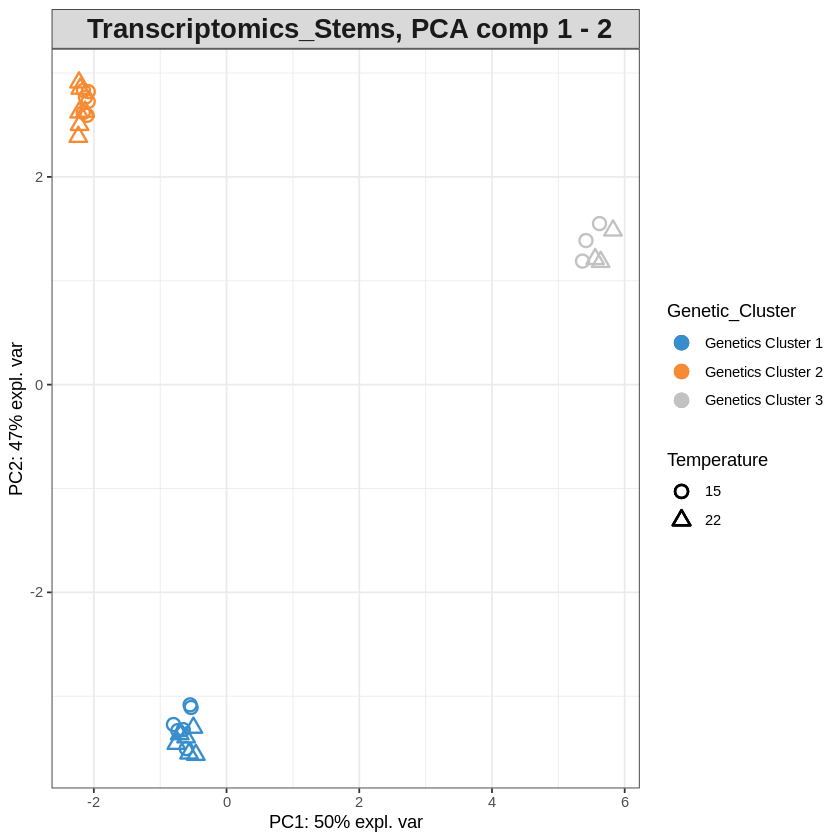

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

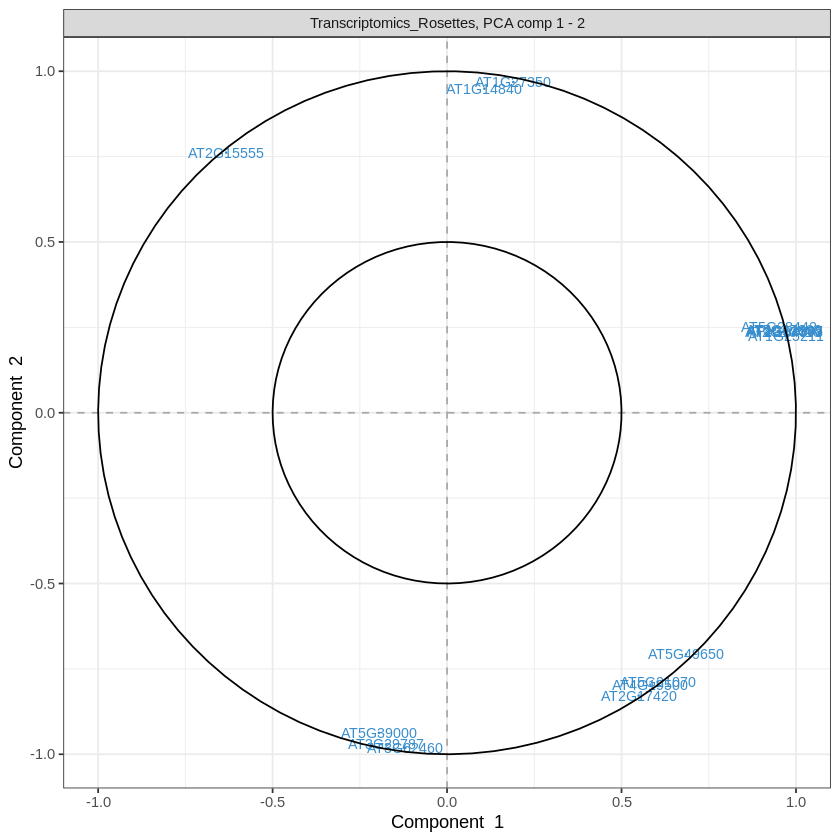

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


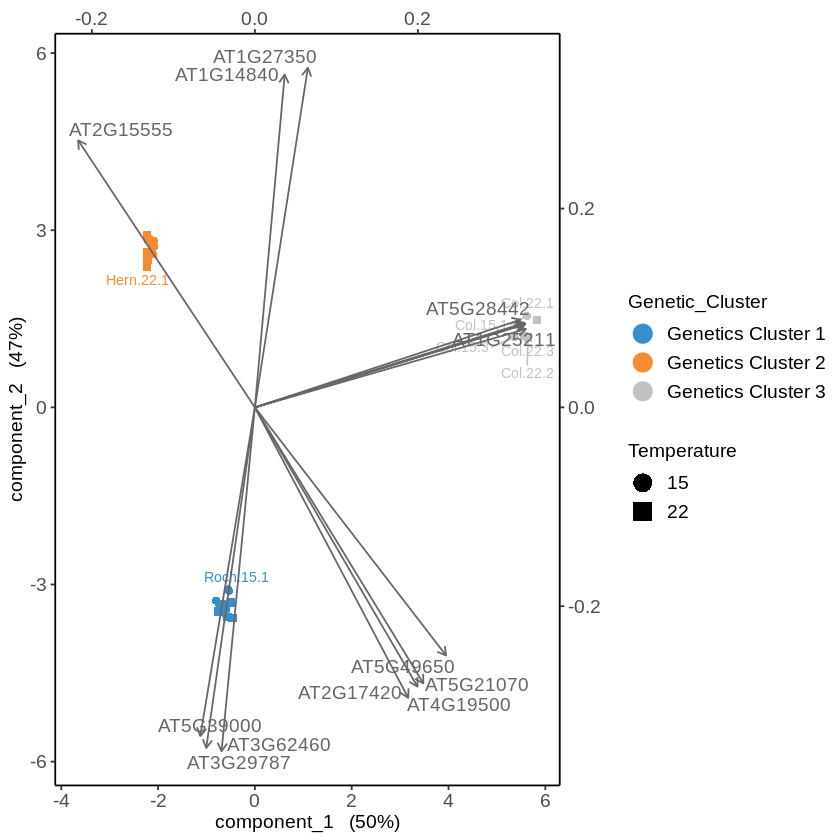

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")

**Transcriptomics_Stems_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4919649 0.7556673 0.8260855 0.8763417 0.9131438 0.9343578 0.9511006 0.9666023 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.9771888 0.9846566 0.9908973 0.9942076 0.9968378 0.9989249 1.0000000 


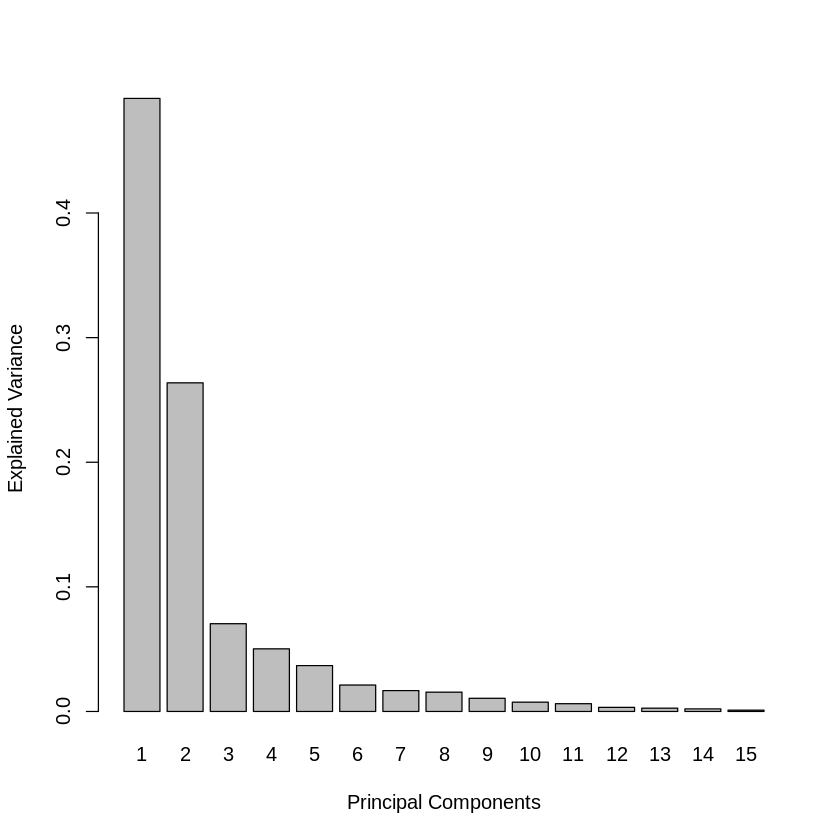

In [ ]:
x<-Transcriptomics_Stems_CW
tune_pca_Transcriptomics_Stems_CW<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems_CW)
print(tune_pca_Transcriptomics_Stems_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems_CW$var.tot)
print(final_pca_Transcriptomics_Stems_CW$prop_expl_var$X)

[1] 15
      PC1       PC2 
0.4919649 0.2637024 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT2G05790,0.3301749
AT4G21590,0.3235982
AT2G02850,0.3202735
AT1G66850,0.3195288
AT2G10940,0.3179010
AT2G18660,-0.2897877


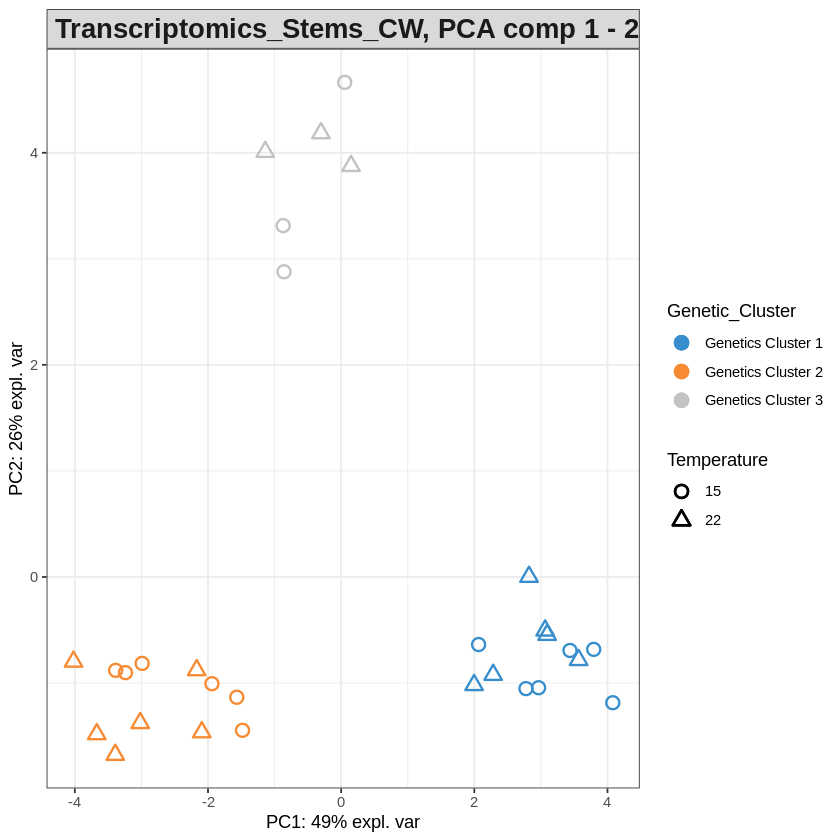

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Genetic_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Genetic_Cluster',
          legend.title.pch = 'Temperature')

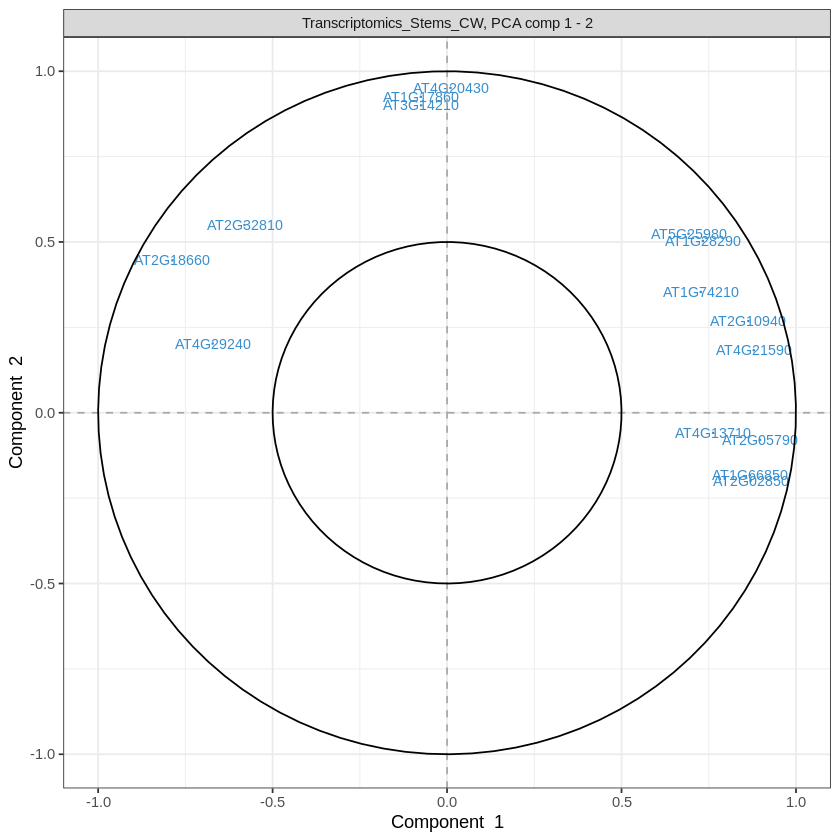

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Stems_CW, PCA comp 1 - 2')

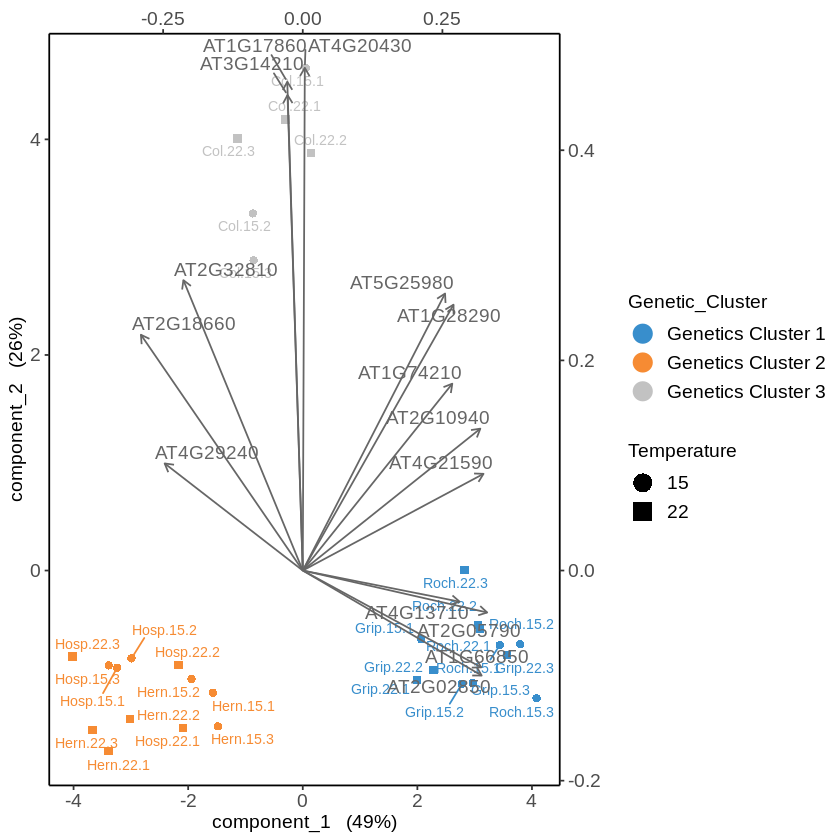

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems_CW,
        group = Genetic_Cluster ,
        pch = Temperature, 
       legend.title = 'Genetic_Cluster',
       legend.title.pch="Temperatue")